In [ ]:
#importing sqlite and other necessary libraries
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook
import ydata_profiling
from ydata_profiling import ProfileReport
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# from numba import jit
# Ignore/Filter warnings
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [ ]:
#Establishing a connection to the database
con = sqlite3.connect('accident_data_v1.0.0_2023.db')

In [ ]:
#Creating a cursor for the established connection
cur = con.cursor()

In [ ]:
#Checking the attributes of the accident table
col_info = cur.execute(f"PRAGMA table_info(accident)")
accident_info = col_info.fetchall()
accident_info

[(0, 'accident_index', '', 0, None, 1),
 (1, 'accident_year', '', 0, None, 0),
 (2, 'accident_reference', '', 0, None, 0),
 (3, 'location_easting_osgr', '', 0, None, 0),
 (4, 'location_northing_osgr', '', 0, None, 0),
 (5, 'longitude', '', 0, None, 0),
 (6, 'latitude', '', 0, None, 0),
 (7, 'police_force', '', 0, None, 0),
 (8, 'accident_severity', '', 0, None, 0),
 (9, 'number_of_vehicles', '', 0, None, 0),
 (10, 'number_of_casualties', '', 0, None, 0),
 (11, 'date', '', 0, None, 0),
 (12, 'day_of_week', '', 0, None, 0),
 (13, 'time', '', 0, None, 0),
 (14, 'local_authority_district', '', 0, None, 0),
 (15, 'local_authority_ons_district', '', 0, None, 0),
 (16, 'local_authority_highway', '', 0, None, 0),
 (17, 'first_road_class', '', 0, None, 0),
 (18, 'first_road_number', '', 0, None, 0),
 (19, 'road_type', '', 0, None, 0),
 (20, 'speed_limit', '', 0, None, 0),
 (21, 'junction_detail', '', 0, None, 0),
 (22, 'junction_control', '', 0, None, 0),
 (23, 'second_road_class', '', 0, None,

In [ ]:
#Checking the names of the columns in the accident table
acc_info_cols = []

for i in accident_info:
    acc_info_cols.append(i[1])
print(acc_info_cols)

['accident_index', 'accident_year', 'accident_reference', 'location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude', 'police_force', 'accident_severity', 'number_of_vehicles', 'number_of_casualties', 'date', 'day_of_week', 'time', 'local_authority_district', 'local_authority_ons_district', 'local_authority_highway', 'first_road_class', 'first_road_number', 'road_type', 'speed_limit', 'junction_detail', 'junction_control', 'second_road_class', 'second_road_number', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag', 'lsoa_of_accident_location']


In [ ]:
#Checking the attributes of the vehicle table
col_info = cur.execute(f"PRAGMA table_info(vehicle)")
vehicle_info = col_info.fetchall()
vehicle_info

[(0, 'vehicle_index', '', 0, None, 1),
 (1, 'accident_index', '', 0, None, 0),
 (2, 'accident_year', '', 0, None, 0),
 (3, 'accident_reference', '', 0, None, 0),
 (4, 'vehicle_reference', '', 0, None, 0),
 (5, 'vehicle_type', '', 0, None, 0),
 (6, 'towing_and_articulation', '', 0, None, 0),
 (7, 'vehicle_manoeuvre', '', 0, None, 0),
 (8, 'vehicle_direction_from', '', 0, None, 0),
 (9, 'vehicle_direction_to', '', 0, None, 0),
 (10, 'vehicle_location_restricted_lane', '', 0, None, 0),
 (11, 'junction_location', '', 0, None, 0),
 (12, 'skidding_and_overturning', '', 0, None, 0),
 (13, 'hit_object_in_carriageway', '', 0, None, 0),
 (14, 'vehicle_leaving_carriageway', '', 0, None, 0),
 (15, 'hit_object_off_carriageway', '', 0, None, 0),
 (16, 'first_point_of_impact', '', 0, None, 0),
 (17, 'vehicle_left_hand_drive', '', 0, None, 0),
 (18, 'journey_purpose_of_driver', '', 0, None, 0),
 (19, 'sex_of_driver', '', 0, None, 0),
 (20, 'age_of_driver', '', 0, None, 0),
 (21, 'age_band_of_driver', 

In [ ]:
#Checking the names of the columns in the vehicle table
veh_info_cols = []

for i in vehicle_info:
    veh_info_cols.append(i[1])
print(veh_info_cols)

['vehicle_index', 'accident_index', 'accident_year', 'accident_reference', 'vehicle_reference', 'vehicle_type', 'towing_and_articulation', 'vehicle_manoeuvre', 'vehicle_direction_from', 'vehicle_direction_to', 'vehicle_location_restricted_lane', 'junction_location', 'skidding_and_overturning', 'hit_object_in_carriageway', 'vehicle_leaving_carriageway', 'hit_object_off_carriageway', 'first_point_of_impact', 'vehicle_left_hand_drive', 'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver', 'age_band_of_driver', 'engine_capacity_cc', 'propulsion_code', 'age_of_vehicle', 'generic_make_model', 'driver_imd_decile', 'driver_home_area_type']


In [ ]:
#Checking the attributes of the lsoa table
col_info = cur.execute(f"PRAGMA table_info(lsoa)")
lsoa_info = col_info.fetchall()
lsoa_info

[(0, 'objectid', '', 0, None, 1),
 (1, 'lsoa01cd', '', 0, None, 0),
 (2, 'lsoa01nm', '', 0, None, 0),
 (3, 'lsoa01nmw', '', 0, None, 0),
 (4, 'shape__area', '', 0, None, 0),
 (5, 'shape__length', '', 0, None, 0),
 (6, 'globalid', '', 0, None, 0)]

In [ ]:
#Checking the names of the columns in the lsoa table
lso_info_cols = []

for i in lsoa_info:
    lso_info_cols.append(i[1])
print(lso_info_cols)

['objectid', 'lsoa01cd', 'lsoa01nm', 'lsoa01nmw', 'shape__area', 'shape__length', 'globalid']


In [ ]:
#Checking the attributes of the casualty table
col_info = cur.execute(f"PRAGMA table_info(casualty)")
casualty_info = col_info.fetchall()
casualty_info

[(0, 'casualty_index', '', 0, None, 1),
 (1, 'accident_index', '', 0, None, 0),
 (2, 'accident_year', '', 0, None, 0),
 (3, 'accident_reference', '', 0, None, 0),
 (4, 'vehicle_reference', '', 0, None, 0),
 (5, 'casualty_reference', '', 0, None, 0),
 (6, 'casualty_class', '', 0, None, 0),
 (7, 'sex_of_casualty', '', 0, None, 0),
 (8, 'age_of_casualty', '', 0, None, 0),
 (9, 'age_band_of_casualty', '', 0, None, 0),
 (10, 'casualty_severity', '', 0, None, 0),
 (11, 'pedestrian_location', '', 0, None, 0),
 (12, 'pedestrian_movement', '', 0, None, 0),
 (13, 'car_passenger', '', 0, None, 0),
 (14, 'bus_or_coach_passenger', '', 0, None, 0),
 (15, 'pedestrian_road_maintenance_worker', '', 0, None, 0),
 (16, 'casualty_type', '', 0, None, 0),
 (17, 'casualty_home_area_type', '', 0, None, 0),
 (18, 'casualty_imd_decile', '', 0, None, 0)]

In [ ]:
#Checking the names of the columns in the casualty table
cas_info_cols = []

for i in casualty_info:
    cas_info_cols.append(i[1])
print(cas_info_cols)

['casualty_index', 'accident_index', 'accident_year', 'accident_reference', 'vehicle_reference', 'casualty_reference', 'casualty_class', 'sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty', 'casualty_severity', 'pedestrian_location', 'pedestrian_movement', 'car_passenger', 'bus_or_coach_passenger', 'pedestrian_road_maintenance_worker', 'casualty_type', 'casualty_home_area_type', 'casualty_imd_decile']


In [ ]:
#Checking the length of the accident table
res = cur.execute("SELECT COUNT(*) FROM accident")
res.fetchall()

[(461352,)]

In [ ]:
#Checking the length of the vehicle table
res = cur.execute("SELECT COUNT(*) FROM vehicle")
res.fetchall()

[(849091,)]

In [ ]:
#Checking the length of the casualty table
res = cur.execute("SELECT COUNT(*) FROM casualty")
res.fetchall()

[(600332,)]

**Below, the accident data would be extracted as a pandas dataframe object, while also creating an additional column for the hour_of_day in integer data type**

In [ ]:
#Creating an instance of the accident table in a pandas dataframe for accidents that happened in the year 2020
acc_data = "SELECT * FROM accident WHERE accident_year = 2020"

acc_df = pd.read_sql_query(acc_data, con)

#Checking the first 5 rows of the accident table dataframe
acc_df.head()

accident_index  accident_year accident_reference  location_easting_osgr  \
0  2020010219808           2020          010219808               521389.0   
1  2020010220496           2020          010220496               529337.0   
2  2020010228005           2020          010228005               526432.0   
3  2020010228006           2020          010228006               538676.0   
4  2020010228011           2020          010228011               529324.0   

   location_northing_osgr  longitude   latitude  police_force  \
0                175144.0  -0.254001  51.462262             1   
1                176237.0  -0.139253  51.470327             1   
2                182761.0  -0.178719  51.529614             1   
3                184371.0  -0.001683  51.541210             1   
4                181286.0  -0.137592  51.515704             1   

   accident_severity  number_of_vehicles  ...  \
0                  3                   1  ...   
1                  3                   1  ...   
2                  3                   1  ...   
3                  2                   1  ...   
4                  3                   1  ...   

   pedestrian_crossing_physical_facilities light_conditions  \
0                                        9                1   
1                                        4                1   
2                                        0                4   
3                                        4                4   
4                                        0                4   

   weather_conditions road_surface_conditions  special_conditions_at_site  \
0                   9                       9                           0   
1                   1                       1                           0   
2                   1                       2                           0   
3                   1                       1                           0   
4                   1                       1                           0   

  carriageway_hazards urban_or_rural_area  \
0                   0                   1   
1                   0                   1   
2                   0                   1   
3                   0                   1   
4                   0                   1   

   did_police_officer_attend_scene_of_accident  trunk_road_flag  \
0                                            3                2   
1                                            1                2   
2                                            1                2   
3                                            1                2   
4                                            1                2   

   lsoa_of_accident_location  
0                  E01004576  
1                  E01003034  
2                  E01004726  
3                  E01003617  
4                  E01004763  

[5 rows x 36 columns]

In [ ]:
#Creating an instance of the accident table in a pandas dataframe for accidents that happened in
#the year 2020, adding an extra column for hour of the day that the accident occured
acc_data = "SELECT *, CAST(SUBSTR(time, 1, 2) AS INT) AS hour_of_day FROM accident WHERE accident_year = 2020"

acc_df = pd.read_sql_query(acc_data, con)

#Checking the first 5 rows of the accident table dataframe
acc_df.head()

accident_index  accident_year accident_reference  location_easting_osgr  \
0  2020010219808           2020          010219808               521389.0   
1  2020010220496           2020          010220496               529337.0   
2  2020010228005           2020          010228005               526432.0   
3  2020010228006           2020          010228006               538676.0   
4  2020010228011           2020          010228011               529324.0   

   location_northing_osgr  longitude   latitude  police_force  \
0                175144.0  -0.254001  51.462262             1   
1                176237.0  -0.139253  51.470327             1   
2                182761.0  -0.178719  51.529614             1   
3                184371.0  -0.001683  51.541210             1   
4                181286.0  -0.137592  51.515704             1   

   accident_severity  number_of_vehicles  ...  light_conditions  \
0                  3                   1  ...                 1   
1                  3                   1  ...                 1   
2                  3                   1  ...                 4   
3                  2                   1  ...                 4   
4                  3                   1  ...                 4   

  weather_conditions  road_surface_conditions special_conditions_at_site  \
0                  9                        9                          0   
1                  1                        1                          0   
2                  1                        2                          0   
3                  1                        1                          0   
4                  1                        1                          0   

   carriageway_hazards urban_or_rural_area  \
0                    0                   1   
1                    0                   1   
2                    0                   1   
3                    0                   1   
4                    0                   1   

  did_police_officer_attend_scene_of_accident  trunk_road_flag  \
0                                           3                2   
1                                           1                2   
2                                           1                2   
3                                           1                2   
4                                           1                2   

   lsoa_of_accident_location  hour_of_day  
0                  E01004576            9  
1                  E01003034           13  
2                  E01004726            1  
3                  E01003617            1  
4                  E01004763            2  

[5 rows x 37 columns]

In [ ]:
#Checking the details of the new accident table dataframe
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 37 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91199 non-null  object 
 1   accident_year                                91199 non-null  int64  
 2   accident_reference                           91199 non-null  object 
 3   location_easting_osgr                        91185 non-null  float64
 4   location_northing_osgr                       91185 non-null  float64
 5   longitude                                    91185 non-null  float64
 6   latitude                                     91185 non-null  float64
 7   police_force                                 91199 non-null  int64  
 8   accident_severity                            91199 non-null  int64  
 9   number_of_vehicles                           91199 non-null  int64  
 10

In [ ]:
#Creating an instance of the vehicle table in a pandas dataframe for accidents that happened in the year 2020
veh_data = "SELECT * FROM vehicle WHERE accident_year = 2020"

veh_df = pd.read_sql_query(veh_data, con)

#Checking the first 5 rows of the vehicle table dataframe
veh_df.head()

vehicle_index accident_index  accident_year accident_reference  \
0         681716  2020010219808           2020          010219808   
1         681717  2020010220496           2020          010220496   
2         681718  2020010228005           2020          010228005   
3         681719  2020010228006           2020          010228006   
4         681720  2020010228011           2020          010228011   

   vehicle_reference  vehicle_type  towing_and_articulation  \
0                  1             9                        9   
1                  1             9                        0   
2                  1             9                        0   
3                  1             8                        0   
4                  1             9                        0   

   vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  ...  \
0                  5                       1                     5  ...   
1                  4                       2                     6  ...   
2                 18                      -1                    -1  ...   
3                 18                       1                     5  ...   
4                 18                       3                     7  ...   

   journey_purpose_of_driver  sex_of_driver  age_of_driver  \
0                          6              2             32   
1                          2              1             45   
2                          6              3             -1   
3                          1              1             44   
4                          6              1             20   

   age_band_of_driver  engine_capacity_cc  propulsion_code  age_of_vehicle  \
0                   6                1968                2               6   
1                   7                1395                1               2   
2                  -1                  -1               -1              -1   
3                   7                1798                8               8   
4                   4                2993                2               4   

   generic_make_model  driver_imd_decile  driver_home_area_type  
0             AUDI Q5                  4                      1  
1             AUDI A1                  7                      1  
2                  -1                 -1                     -1  
3        TOYOTA PRIUS                  2                      1  
4        BMW 4 SERIES                 -1                     -1  

[5 rows x 28 columns]

In [ ]:
#Checking the details of the new vehicle table dataframe
veh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167375 entries, 0 to 167374
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   vehicle_index                     167375 non-null  int64 
 1   accident_index                    167375 non-null  object
 2   accident_year                     167375 non-null  int64 
 3   accident_reference                167375 non-null  object
 4   vehicle_reference                 167375 non-null  int64 
 5   vehicle_type                      167375 non-null  int64 
 6   towing_and_articulation           167375 non-null  int64 
 7   vehicle_manoeuvre                 167375 non-null  int64 
 8   vehicle_direction_from            167375 non-null  int64 
 9   vehicle_direction_to              167375 non-null  int64 
 10  vehicle_location_restricted_lane  167375 non-null  int64 
 11  junction_location                 167375 non-null  int64 
 12  sk

In [ ]:
#Creating an instance of the casualty table in a pandas dataframe for accidents that happened in the year 2020
cas_data = "SELECT * FROM casualty WHERE accident_year = 2020"

cas_df = pd.read_sql_query(cas_data, con)

#Checking the first 5 rows of the casualty table dataframe
cas_df.head()

casualty_index accident_index  accident_year accident_reference  \
0          484748  2020010219808           2020          010219808   
1          484749  2020010220496           2020          010220496   
2          484750  2020010220496           2020          010220496   
3          484751  2020010228005           2020          010228005   
4          484752  2020010228006           2020          010228006   

   vehicle_reference  casualty_reference  casualty_class  sex_of_casualty  \
0                  1                   1               3                1   
1                  1                   1               3                2   
2                  1                   2               3                2   
3                  1                   1               3                1   
4                  1                   1               3                1   

   age_of_casualty  age_band_of_casualty  casualty_severity  \
0               31                     6                  3   
1                2                     1                  3   
2                4                     1                  3   
3               23                     5                  3   
4               47                     8                  2   

   pedestrian_location  pedestrian_movement  car_passenger  \
0                    9                    5              0   
1                    1                    1              0   
2                    1                    1              0   
3                    5                    9              0   
4                    4                    1              0   

   bus_or_coach_passenger  pedestrian_road_maintenance_worker  casualty_type  \
0                       0                                   0              0   
1                       0                                   0              0   
2                       0                                   0              0   
3                       0                                   0              0   
4                       0                                   0              0   

   casualty_home_area_type  casualty_imd_decile  
0                        1                    4  
1                        1                    2  
2                        1                    2  
3                        1                    3  
4                        1                    3

In [ ]:
#Checking the details of the new casualty table dataframe
cas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115584 entries, 0 to 115583
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   casualty_index                      115584 non-null  int64 
 1   accident_index                      115584 non-null  object
 2   accident_year                       115584 non-null  int64 
 3   accident_reference                  115584 non-null  object
 4   vehicle_reference                   115584 non-null  int64 
 5   casualty_reference                  115584 non-null  int64 
 6   casualty_class                      115584 non-null  int64 
 7   sex_of_casualty                     115584 non-null  int64 
 8   age_of_casualty                     115584 non-null  int64 
 9   age_band_of_casualty                115584 non-null  int64 
 10  casualty_severity                   115584 non-null  int64 
 11  pedestrian_location                 115

In [ ]:
#Creating an instance of the lsoa table in a pandas dataframe for accidents that happened in the year 2020
lsoa_data = """SELECT lsoa.*
                FROM lsoa
                JOIN accident ON accident.lsoa_of_accident_location = lsoa.lsoa01cd
                WHERE accident_year = 2020 """

lsoa_df = pd.read_sql_query(lsoa_data, con)

#Checking the first 5 rows of the lsoa table dataframe
lsoa_df.head()

objectid   lsoa01cd          lsoa01nm         lsoa01nmw    shape__area  \
0      4576  E01004576   Wandsworth 013D   Wandsworth 013D  445625.061623   
1      3034  E01003034      Lambeth 012A      Lambeth 012A  114698.446686   
2      4726  E01004726  Westminster 003C  Westminster 003C  185726.854301   
3      3617  E01003617       Newham 012B       Newham 012B  232690.613373   
4      4763  E01004763  Westminster 013B  Westminster 013B  293663.772385   

   shape__length                              globalid  
0    4486.701130  c7ddebfb-d730-4be6-b67e-938adb21309e  
1    1719.140860  cb2e7f50-252f-469e-9b13-a56794f5d5d6  
2    2698.692831  e5cccc5e-7d0c-4f89-82c3-2a5d03b1ae18  
3    3013.438191  3e1979c9-8863-4982-afa5-7a6de00635d7  
4    4706.823542  94474f4a-0fea-4630-9173-e8fdbb834c34

In [ ]:
#Checking the details of the new lsoa table dataframe
lsoa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83154 entries, 0 to 83153
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   objectid       83154 non-null  int64  
 1   lsoa01cd       83154 non-null  object 
 2   lsoa01nm       83154 non-null  object 
 3   lsoa01nmw      83154 non-null  object 
 4   shape__area    83154 non-null  float64
 5   shape__length  83154 non-null  float64
 6   globalid       83154 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 4.4+ MB


# EDA And Data Cleaning

In [ ]:
#Creating a profile report on the accident data
#accident_profile = ProfileReport(acc_df, title = "Acident Data Profile")
#accident_profile

In [ ]:
#Checking the accident table to visualise the columns with the missing values

acc_df.isnull().sum()

accident_index                                  0
accident_year                                   0
accident_reference                              0
location_easting_osgr                          14
location_northing_osgr                         14
longitude                                      14
latitude                                       14
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
local_authority_ons_district                    0
local_authority_highway                         0
first_road_class                                0
first_road_number                               0
road_type                                       0


In [ ]:
#Checking the statistical summary of the accident dataframe
acc_df.describe()

accident_year  location_easting_osgr  location_northing_osgr  \
count        91199.0           91185.000000            9.118500e+04   
mean          2020.0          456487.876416            2.737645e+05   
std              0.0           93512.711807            1.473516e+05   
min           2020.0           65947.000000            1.271500e+04   
25%           2020.0          392890.000000            1.745690e+05   
50%           2020.0          465545.000000            2.085990e+05   
75%           2020.0          530168.000000            3.783660e+05   
max           2020.0          655138.000000            1.184351e+06   

          longitude      latitude  police_force  accident_severity  \
count  91185.000000  91185.000000  91199.000000       91199.000000   
mean      -1.189258     52.351073     27.488043           2.768232   
std        1.367786      1.327573     24.548964           0.456682   
min       -7.497375     49.970479      1.000000           1.000000   
25%       -2.107789     51.457237      4.000000           3.000000   
50%       -1.046912     51.763385     22.000000           3.000000   
75%       -0.125238     53.297386     45.000000           3.000000   
max        1.756257     60.541144     99.000000           3.000000   

       number_of_vehicles  number_of_casualties   day_of_week  ...  \
count        91199.000000          91199.000000  91199.000000  ...   
mean             1.835272              1.267382      4.121558  ...   
std              0.677272              0.681473      1.932200  ...   
min              1.000000              1.000000      1.000000  ...   
25%              1.000000              1.000000      2.000000  ...   
50%              2.000000              1.000000      4.000000  ...   
75%              2.000000              1.000000      6.000000  ...   
max             13.000000             41.000000      7.000000  ...   

       pedestrian_crossing_physical_facilities  light_conditions  \
count                             91199.000000      91199.000000   
mean                                  1.185309          2.065308   
std                                   2.445924          1.747690   
min                                  -1.000000         -1.000000   
25%                                   0.000000          1.000000   
50%                                   0.000000          1.000000   
75%                                   0.000000          4.000000   
max                                   9.000000          7.000000   

       weather_conditions  road_surface_conditions  \
count        91199.000000             91199.000000   
mean             1.702047                 1.391583   
std              1.845786                 0.925690   
min             -1.000000                -1.000000   
25%              1.000000                 1.000000   
50%              1.000000                 1.000000   
75%              1.000000                 2.000000   
max              9.000000                 9.000000   

       special_conditions_at_site  carriageway_hazards  urban_or_rural_area  \
count                91199.000000         91199.000000         91199.000000   
mean                     0.244740             0.180594             1.323205   
std                      1.318554             1.149791             0.468031   
min                     -1.000000            -1.000000             1.000000   
25%                      0.000000             0.000000             1.000000   
50%                      0.000000             0.000000             1.000000   
75%                      0.000000             0.000000             2.000000   
max                      9.000000             9.000000             3.000000   

       did_police_officer_attend_scene_of_accident  trunk_road_flag  \
count                                 91199.000000     91199.000000   
mean                                      1.415268         1.721521   
std                                       0.665469         0.801491   
min      

### Summary of The Accident Table
- There are 36 columns in the table. Of these, 13 contain categorical variables, while 23 contain numerical variables
- The table 91,199 total observations, and 56 missing valuses. The missing values thereby constituting less than 0.1% of the total observations
- No duplicates were found in the table
- The missing values appeare to have resulted from 14 entries having null values in their location related attributes

In [ ]:
#Creating a profile report on the vehicle data
#vehicle_profile = ProfileReport(veh_df, title = "Vehicle Data Profile")
#vehicle_profile

In [ ]:
#Checking the vehicle table to visualise the columns with the missing values

veh_df.isnull().sum()

vehicle_index                       0
accident_index                      0
accident_year                       0
accident_reference                  0
vehicle_reference                   0
vehicle_type                        0
towing_and_articulation             0
vehicle_manoeuvre                   0
vehicle_direction_from              0
vehicle_direction_to                0
vehicle_location_restricted_lane    0
junction_location                   0
skidding_and_overturning            0
hit_object_in_carriageway           0
vehicle_leaving_carriageway         0
hit_object_off_carriageway          0
first_point_of_impact               0
vehicle_left_hand_drive             0
journey_purpose_of_driver           0
sex_of_driver                       0
age_of_driver                       0
age_band_of_driver                  0
engine_capacity_cc                  0
propulsion_code                     0
age_of_vehicle                      0
generic_make_model                  0
driver_imd_d

In [ ]:
#Checking the statistical summary of the vehicle dataframe
veh_df.describe()

vehicle_index  accident_year  vehicle_reference   vehicle_type  \
count   167375.00000       167375.0      167375.000000  167375.000000   
mean    765403.00000         2020.0           1.549198      10.051310   
std      48317.14499            0.0           2.538196      11.692412   
min     681716.00000         2020.0           1.000000       1.000000   
25%     723559.50000         2020.0           1.000000       9.000000   
50%     765403.00000         2020.0           1.000000       9.000000   
75%     807246.50000         2020.0           2.000000       9.000000   
max     849090.00000         2020.0         999.000000      98.000000   

       towing_and_articulation  vehicle_manoeuvre  vehicle_direction_from  \
count            167375.000000      167375.000000           167375.000000   
mean                  0.221664          19.538987                4.406387   
std                   1.344230          23.661274                2.718826   
min                  -1.000000          -1.000000               -1.000000   
25%                   0.000000           9.000000                2.000000   
50%                   0.000000          18.000000                5.000000   
75%                   0.000000          18.000000                7.000000   
max                   9.000000          99.000000                9.000000   

       vehicle_direction_to  vehicle_location_restricted_lane  \
count         167375.000000                     167375.000000   
mean               4.455068                          7.537870   
std                2.696937                         25.898393   
min               -1.000000                         -1.000000   
25%                2.000000                          0.000000   
50%                5.000000                          0.000000   
75%                7.000000                          0.000000   
max                9.000000                         99.000000   

       junction_location  ...  vehicle_left_hand_drive  \
count      167375.000000  ...            167375.000000   
mean            2.598303  ...                 1.448962   
std             3.285627  ...                 1.854349   
min            -1.000000  ...                -1.000000   
25%             0.000000  ...                 1.000000   
50%             1.000000  ...                 1.000000   
75%             6.000000  ...                 1.000000   
max             9.000000  ...                 9.000000   

       journey_purpose_of_driver  sex_of_driver  age_of_driver  \
count              167375.000000  167375.000000  167375.000000   
mean                    4.717066       1.480347      34.509658   
std                     1.914971       0.693344      20.797517   
min                    -1.000000      -1.000000      -1.000000   
25%                     4.000000       1.000000      22.000000   
50%                     6.000000       1.000000      34.000000   
75%                     6.000000       2.000000      49.000000   
max                     6.000000       3.000000     100.000000   

       age_band_of_driver  engine_capacity_cc  propulsion_code  \
count       167375.000000       167375.000000    167375.000000   
mean             5.780272         1332.294554         0.970121   
std              3.185713         1543.509942         1.585310   
min             -1.000000           -1.000000        -1.000000   
25%              5.000000           -1.000000        -1.000000   
50%              6.000000         1368.000000         1.000000   
75%              8.000000         1910.000000         2.000000   
max             11.000000        17696.000000        12.000000   

       age_of_vehicle  driver_imd_decile  driver_home_area_type  
count   167375.000000      167375.000000          167375.000000  
mean         5.820600           3.904143               0.871253  
std          6.331929           3.445329               1.072733  
min         -1.000000          -1.000000              -1.000000  
25%         -1.000000     

### Summary of The Vehicle Table
- There are no missing values in the vehicle table
- There are 28 columns in the vehicle table; 21 numerical variables and 7 categorical variables.
- The table contains 167,375 observations, which is more than the number of recorded accidents as it is expected that accidents would a lot of times involve more than one vehicle
- The towing_and_articulation, vehicle_leaving_carriageway, first_point_of_impact, vehicle_left_hand_drive and skidding_and_overturning columns have -1 and 9 as classes which are likely errors
- The vehicle_manoeuvre, hit_object_in_carriageway, hit_object_off_carriageway and vehicle_location_restricted_lane columns have -1 and 99 as classes
- The -1, 0 and 9 classes in the vehicle_direct to and fro appears to be errors
- The journey_purpose_of_drive and sex_of_driver columns have an erroneous class of -1
- The age_of_driver column had ages of -1
- There are 43,072 cars with age -1
- The generic_make_model column had 47,637 classes as -1

In [ ]:
#Creating a profile report on the casualty data
#casualty_profile = ProfileReport(cas_df, title = "Casualty Data Profile")
#casualty_profile

In [ ]:
#Checking the casualty table to visualise the columns with the missing values

cas_df.isnull().sum()

casualty_index                        0
accident_index                        0
accident_year                         0
accident_reference                    0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
dtype: int64

In [ ]:
#Checking the statistical summary of the casualty dataframe
cas_df.describe()

casualty_index  accident_year  vehicle_reference  casualty_reference  \
count   115584.000000       115584.0      115584.000000       115584.000000   
mean    542539.500000         2020.0           1.460557            1.347790   
std      33366.371094            0.0           2.991765            4.036721   
min     484748.000000         2020.0           1.000000            1.000000   
25%     513643.750000         2020.0           1.000000            1.000000   
50%     542539.500000         2020.0           1.000000            1.000000   
75%     571435.250000         2020.0           2.000000            1.000000   
max     600331.000000         2020.0         999.000000          992.000000   

       casualty_class  sex_of_casualty  age_of_casualty  age_band_of_casualty  \
count   115584.000000    115584.000000    115584.000000         115584.000000   
mean         1.441272         1.354859        36.489748              6.292610   
std          0.708365         0.520195        18.985022              2.392856   
min          1.000000        -1.000000        -1.000000             -1.000000   
25%          1.000000         1.000000        23.000000              5.000000   
50%          1.000000         1.000000        33.000000              6.000000   
75%          2.000000         2.000000        50.000000              8.000000   
max          3.000000         9.000000        99.000000             11.000000   

       casualty_severity  pedestrian_location  pedestrian_movement  \
count      115584.000000        115584.000000        115584.000000   
mean            2.800820             0.696861             0.561592   
std             0.429851             2.059930             1.879680   
min             1.000000            -1.000000            -1.000000   
25%             3.000000             0.000000             0.000000   
50%             3.000000             0.000000             0.000000   
75%             3.000000             0.000000             0.000000   
max             3.000000            10.000000             9.000000   

       car_passenger  bus_or_coach_passenger  \
count  115584.000000           115584.000000   
mean        0.223093                0.038950   
std         0.603991                0.381528   
min        -1.000000               -1.000000   
25%         0.000000                0.000000   
50%         0.000000                0.000000   
75%         0.000000                0.000000   
max         9.000000                9.000000   

       pedestrian_road_maintenance_worker  casualty_type  \
count                       115584.000000  115584.000000   
mean                             0.012709       7.388367   
std                              0.164516       9.914714   
min                             -1.000000       0.000000   
25%                              0.000000       1.000000   
50%                              0.000000       9.000000   
75%                              0.000000       9.000000   
max                              2.000000      98.000000   

       casualty_home_area_type  casualty_imd_decile  
count            115584.000000         115584.00000  
mean                  1.078177              4.36114  
std                   0.904791              3.17141  
min                  -1.000000             -1.00000  
25%                   1.000000              2.00000  
50%                   1.000000              4.00000  
75%                   1.000000              7.00000  
max                   3.000000             10.00000

### Summary of The Casualty Table
- There are no missing values in the casualty table
- There are 19 columns in the casualty table; 10 categorical variables and 23 numerical variables
- The table contains 115,584 observations.
- The sex_of_casualty, car_passanger and the bus_or_coach_passanger columns seems to have some erronous calsses 0f -1 and 9
- pedestrian_road_maintenance_worker has -1 as a category

In [ ]:
lsoa_df.isnull().sum()

objectid         0
lsoa01cd         0
lsoa01nm         0
lsoa01nmw        0
shape__area      0
shape__length    0
globalid         0
dtype: int64

In [ ]:
lsoa_df.describe()

objectid   shape__area  shape__length
count  83154.000000  8.315400e+04   83154.000000
mean   15797.244534  7.748851e+06   11711.392927
std    10297.716036  2.017186e+07   14569.244886
min        1.000000  3.521210e+04     917.967312
25%     5346.000000  2.860086e+05    3426.905208
50%    15857.500000  6.276203e+05    5189.289278
75%    24704.000000  4.308770e+06   13107.960977
max    34376.000000  6.837464e+08  172059.830830

### Summary of The Lsoa Table
- There are 7 columns and 83,154 observations.
- There are no missing values in the lsoa table

In [ ]:
# 9 columns
# sex_of_casualty, car_passanger, bus_or_coach_passanger, vehicle_direction_from, vehicle_direction_to,
# towing_and_articulation, vehicle_leaving_carriageway, first_point_of_impact, vehicle_left_hand_drive,
# skidding_and_overturning, road_surface_conditions, special_conditions_at_site,
# carriageway_hazards

# 99 columns
#  vehicle_manoeuvre, hit_object_in_carriageway, hit_object_off_carriageway, vehicle_location_restricted_lane, police_force
#

In [ ]:
#Creating a profile report on the accident data
#lsoa_profile = ProfileReport(lsoa_df, title = "lsoa Data Profile")
#lsoa_profile

## Data Cleaning
- From the profile report generated, it can be seen that missing values are around the location variables, and likely to involve the same inputs(rows). If this is so, it would mean for sure that the total number of rows affected would be only 14 of the total of 91,199 rows, which would make it safe to delete the affected rows.

In [ ]:
#Creating a dataframe for 2020 accident data
acc_data = """SELECT accident.*, SUBSTR(time, 1, 2) AS hour_of_day, lsoa.*, vehicle.*, casualty.*
                FROM accident
                JOIN lsoa ON lsoa.lsoa01cd = accident.lsoa_of_accident_location
                JOIN vehicle ON vehicle.accident_index = accident.accident_index
                JOIN casualty ON casualty.accident_index = accident.accident_index
                WHERE accident.accident_year = 2020
                """
acc_data_df = pd.read_sql_query(acc_data, con)

In [ ]:
#Checking the dataframe for missing values
acc_df.isnull().sum()

accident_index                                  0
accident_year                                   0
accident_reference                              0
location_easting_osgr                          14
location_northing_osgr                         14
longitude                                      14
latitude                                       14
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
local_authority_ons_district                    0
local_authority_highway                         0
first_road_class                                0
first_road_number                               0
road_type                                       0


In [ ]:
#Using the .loc accessor to access the rows in the longitude column with null values
missing_values = acc_df.loc[acc_df['longitude'].isnull()]
missing_values

accident_index  accident_year accident_reference  location_easting_osgr  \
25520  2020052002442           2020          052002442                    NaN   
29452  2020070769852           2020          070769852                    NaN   
32689  2020122001194           2020          122001194                    NaN   
33578  2020137330369           2020          137330369                    NaN   
81252  2020522005114           2020          522005114                    NaN   
86437  2020622001016           2020          622001016                    NaN   
86642  202063A017520           2020          63A017520                    NaN   
86651  202063A018920           2020          63A018920                    NaN   
86668  202063A025020           2020          63A025020                    NaN   
86705  202063A035620           2020          63A035620                    NaN   
86785  202063A059120           2020          63A059120                    NaN   
87018  202063C020320           2020          63C020320                    NaN   
87030  202063C024520           2020          63C024520                    NaN   
87296  202063D061520           2020          63D061520                    NaN   

       location_northing_osgr  longitude  latitude  police_force  \
25520                     NaN        NaN       NaN             5   
29452                     NaN        NaN       NaN             7   
32689                     NaN        NaN       NaN            12   
33578                     NaN        NaN       NaN            13   
81252                     NaN        NaN       NaN            52   
86437                     NaN        NaN       NaN            62   
86642                     NaN        NaN       NaN            63   
86651                     NaN        NaN       NaN            63   
86668                     NaN        NaN       NaN            63   
86705                     NaN        NaN       NaN            63   
86785                     NaN        NaN       NaN            63   
87018                     NaN        NaN       NaN            63   
87030                     NaN        NaN       NaN            63   
87296                     NaN        NaN       NaN            63   

       accident_severity  number_of_vehicles  ...  light_conditions  \
25520                  2                   2  ...                 1   
29452                  3                   2  ...                 1   
32689                  3                   2  ...                 1   
33578                  3                   2  ...                 1   
81252                  3                   3  ...                 7   
86437                  3                   2  ...                 4   
86642                  3                   2  ...                 1   
86651                  3                   2  ...                 1   
86668                  3                   2  ...                 1   
86705                  3                   1  ...                 1   
86785                  3                   2  ...                 1   
87018                  3                   2  ...                 7   
87030                  2                   2  ...                 1   
87296                  3                   1  ...                 6   

      weather_conditions  road_surface_conditions special_conditions_at_site  \
25520                  1                        1                          0   
29452                  1                        1                          0   
32689                  2                        2                          0   
33578                  1                        1                          0   
81252                  1                        1                          0   
86437                  1                        1                          0   
86642                  9                       -1                          0   
86651                  9                        1              

- The missing values are from the location_easting_osgr, location_northing_osgr, longitude and latitude which are all clearly related to the location of the accident
- The missing values would be filled using the linear interpolation in the forwarding direction method which uses the preceeding values to estimate the missing values. For this purpose, the data would be sorted using the 'local_authority_highway' so that inputs in similar locations would be grouped together

In [ ]:
#Creating an instance of the dataset sorted using the 'local_authority_highway'
acc_df_srt = acc_df.sort_values(by='local_authority_highway')

In [ ]:
#Carryig out a check on the sorted dataframe
acc_df_srt.head(20)

accident_index  accident_year accident_reference  location_easting_osgr  \
39476  2020170H10190           2020          170H10190               450915.0   
39498  2020170H10410           2020          170H10410               450883.0   
39499  2020170H10420           2020          170H10420               450188.0   
39500  2020170H10430           2020          170H10430               445180.0   
39501  2020170H10440           2020          170H10440               450631.0   
39502  2020170H10450           2020          170H10450               451232.0   
39503  2020170H10460           2020          170H10460               450595.0   
39504  2020170H10470           2020          170H10470               445220.0   
39505  2020170H10480           2020          170H10480               451718.0   
39506  2020170H10500           2020          170H10500               450952.0   
39507  2020170H10510           2020          170H10510               448517.0   
39508  2020170H10520           2020          170H10520               449951.0   
39509  2020170H10530           2020          170H10530               449462.0   
39510  2020170H10540           2020          170H10540               448636.0   
39511  2020170H10550           2020          170H10550               445225.0   
39512  2020170H10560           2020          170H10560               441086.0   
39513  2020170H10570           2020          170H10570               450055.0   
39514  2020170H10580           2020          170H10580               450996.0   
39528  2020170H10720           2020          170H10720               449950.0   
39527  2020170H10710           2020          170H10710               450344.0   

       location_northing_osgr  longitude   latitude  police_force  \
39476                530643.0  -1.212109  54.668310            17   
39498                530669.0  -1.212600  54.668547            17   
39499                531283.0  -1.223270  54.674133            17   
39500                528310.0  -1.301380  54.647891            17   
39501                533985.0  -1.215934  54.698369            17   
39502                529585.0  -1.207379  54.658771            17   
39503                532527.0  -1.216744  54.685271            17   
39504                530371.0  -1.300442  54.666407            17   
39505                528252.0  -1.200082  54.646744            17   
39506                532540.0  -1.211205  54.685352            17   
39507                535908.0  -1.248412  54.715856            17   
39508                533063.0  -1.226641  54.690151            17   
39509                534124.0  -1.234046  54.699734            17   
39510                534854.0  -1.246740  54.706374            17   
39511                528124.0  -1.300712  54.646216            17   
39512                528017.0  -1.364861  54.645607            17   
39513                530680.0  -1.225435  54.668728            17   
39514                534037.0  -1.210262  54.698799            17   
39528                532591.0  -1.226737  54.685910            17   
39527                533808.0  -1.220417  54.696807            17   

       accident_severity  number_of_vehicles  ...  light_conditions  \
39476                  3                   2  ...                 1   
39498                  3                   2  ...                 1   
39499                  3                   2  ...                 1   
39500                  3                   4  ...                 1   
39501                  3                   2  ...                 1   
39502                  3                   2  ...                 1   
39503                  3                   2  ...                 1   
39504                  3                   2  ...                 1   
39505                  3                   2  ...                 1   
39506                  2                   2  ...                 1   
39507                  3                   2  ...                 4   
39

In [ ]:
#Implementing a linear interpolation in the forward direction
acc_df_srt.interpolate(method ='linear', limit_direction ='forward', inplace = True)

In [ ]:
#Re-checking the accident table for missing values

acc_df_srt.isnull().sum()

accident_index                                 0
accident_year                                  0
accident_reference                             0
location_easting_osgr                          0
location_northing_osgr                         0
longitude                                      0
latitude                                       0
police_force                                   0
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
local_authority_district                       0
local_authority_ons_district                   0
local_authority_highway                        0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit         

## Running a query on the database to underdstand accident trends by hours of the day and by days of the week

- Using the substring function to extract the hour of the day by using the first two positions in the time string

In [ ]:
#Selecting hours of the day and the accident occurences within these hours from the accident table
acc_query_hr = """SELECT SUBSTR(time, 1, 2) AS hour_of_day,
                COUNT(accident_index) AS Accident_Occurence
                FROM accident
                WHERE accident_year = 2020
                GROUP BY hour_of_day
                ORDER BY Accident_Occurence DESC"""
acc_query_df_hr = pd.read_sql_query(acc_query_hr, con)
acc_query_df_hr

hour_of_day  Accident_Occurence
0           17                7813
1           16                7381
2           15                7361
3           18                6618
4           14                6245
5           13                5741
6           12                5395
7           08                5267
8           19                5048
9           11                4812
10          10                4173
11          09                3917
12          07                3736
13          20                3715
14          21                3106
15          22                2555
16          06                1830
17          23                1796
18          00                1188
19          01                 915
20          05                 855
21          02                 658
22          03                 566
23          04                 508

<IPython.core.display.Javascript object>


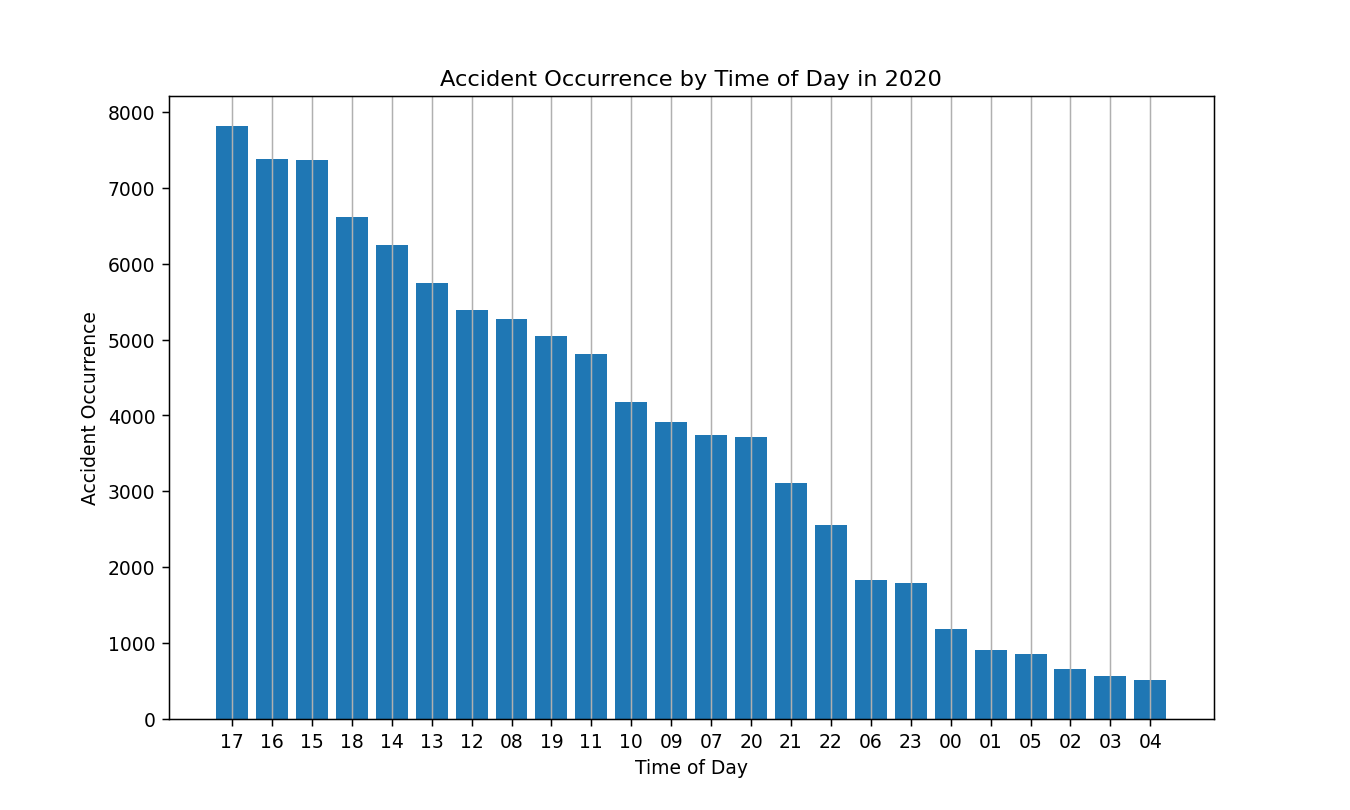

In [ ]:
# Creating a bar plot of the accident occurence against the hours of the day
plt.figure(figsize=(10, 6))
plt.bar(acc_query_df_hr['hour_of_day'], acc_query_df_hr['Accident_Occurence'])
plt.xlabel('Time of Day')
plt.ylabel('Accident Occurrence')
plt.title('Accident Occurrence by Time of Day in 2020')
plt.grid(axis='x')
plt.show()

### Accident Trends By Hours Of The Day
- From the above chart, it can be observed that the most accidents occur late morning and early evening, while the least accidents occured between late at night and the early hours of the morning up till 0500.
- The highest number of accidents were recorded around 1700 hour with an occurence of 7,813 accidents. This was followed by 1600 and 1500 hours at 7,381 and 7,361 accident occurences respectively.
- The least accidents were recoreded between the hours of 0200, 0300 and 0400 hours at 658, 566 and 508 respectively
- Accident occurences progressively increased from the 0500 hours up until 1700 hours. The only exception to this is between 0800 and 0900 hours where where was a drop from 5,267 to 3,917.
- Accident occurences begin to dip at 1800 hours, falling to the least level at 0400 hours where 508 accidents were recorded

In [ ]:
#Selecting days of the week and the accident occurences on these days from the accident table
acc_query_day = """SELECT day_of_week, COUNT(accident_index) AS Accident_Occurence
                FROM accident
                WHERE accident_year = 2020
                GROUP BY day_of_week
                ORDER BY Accident_Occurence DESC"""
acc_query_df_day = pd.read_sql_query(acc_query_day, con)

acc_query_df_day

day_of_week  Accident_Occurence
0            6               14889
1            5               14056
2            4               13564
3            3               13267
4            2               12772
5            7               12336
6            1               10315

<IPython.core.display.Javascript object>


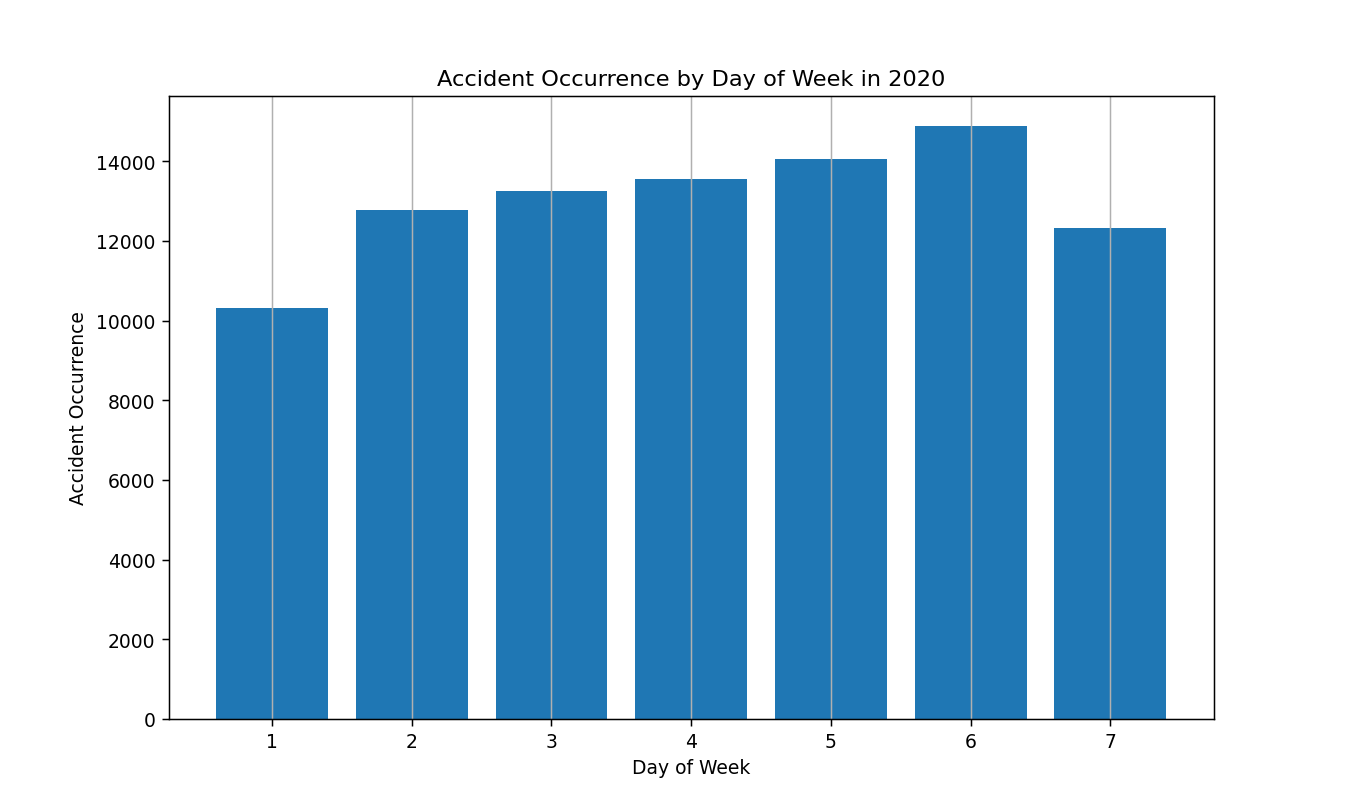

In [ ]:
# Creating a bar plot of the accident occurence against the days of the week
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.bar(acc_query_df_day['day_of_week'], acc_query_df_day['Accident_Occurence'])
plt.xlabel('Day of Week')
plt.ylabel('Accident Occurrence')
plt.title('Accident Occurrence by Day of Week in 2020')
plt.grid(axis = 'x')

plt.show()

### Accident Trends By Days Of The Week

- From the bar plot above, it can be observed that the rate of accident occurences increase from 10,315 on Sunday to 14,889 on Friday.
- The highest accident rates are therefore recorded on Fridays
- Rate of accident occurences dropped from 14,889 on friday to 12,336 on Saturday.

## Running a query on the database to underdstand accident trends for accidents involving motorbikes by hours of the day and by days of the week. They would be analysed based on their engine size

### Trends in accidents involving Motorcycles of engine size 125cc and under

In [ ]:
#Selecting hours of the day and the accident occurences within these hours for accidents involving motorcycles between 50cc & 125cc from the accident table
mbike_under_125_hr = """SELECT SUBSTR(time, 1, 2) AS hour_of_day,
                COUNT(accident.accident_index) AS Accident_Occurence
                FROM accident
                JOIN vehicle ON vehicle.accident_index = accident.accident_index
                WHERE accident.accident_year = 2020 AND vehicle.vehicle_type = 03 OR vehicle.vehicle_type = 02
                GROUP BY hour_of_day
                ORDER BY Accident_Occurence DESC"""
mbike_under_125_hr_df = pd.read_sql_query(mbike_under_125_hr, con)
mbike_under_125_hr_df

hour_of_day  Accident_Occurence
0           17                1293
1           18                1256
2           16                1098
3           15                1019
4           19                1002
5           13                 858
6           14                 844
7           20                 828
8           12                 746
9           21                 659
10          08                 638
11          11                 552
12          22                 501
13          07                 479
14          09                 450
15          10                 448
16          23                 299
17          06                 210
18          00                 128
19          05                 103
20          01                  81
21          02                  58
22          04                  45
23          03                  39

<IPython.core.display.Javascript object>


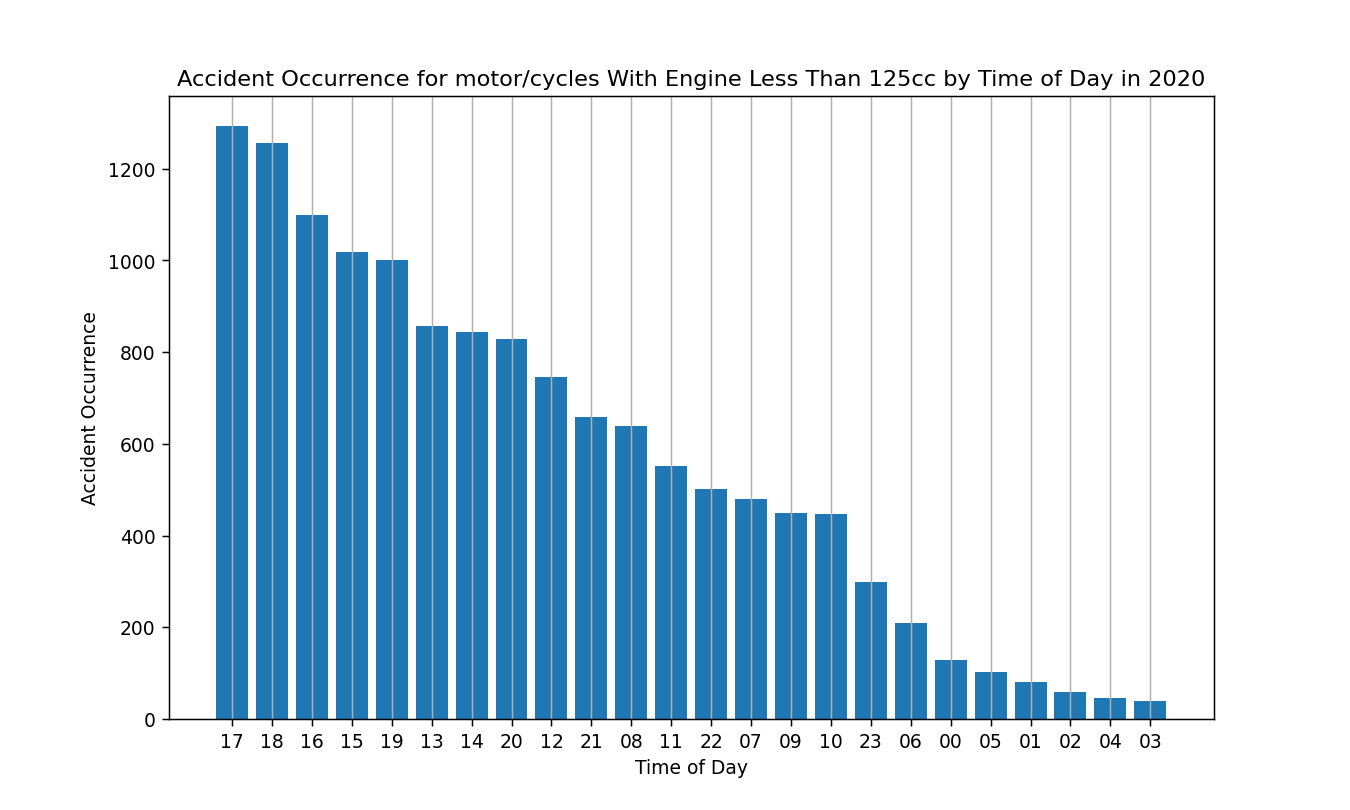

In [ ]:
# Creating a bar plot of the accident occurence for motor/cycles between 50cc & 250cc against the hours of the day
plt.figure(figsize=(10, 6))
plt.bar(mbike_under_125_hr_df['hour_of_day'], mbike_under_125_hr_df['Accident_Occurence'])
plt.xlabel('Time of Day')
plt.ylabel('Accident Occurrence')
plt.title('Accident Occurrence for motor/cycles With Engine Less Than 125cc by Time of Day in 2020')
plt.grid(axis='x')
plt.show()

### Under 125cc Motorcycle Accident Trends By Hours Of The Day
- The trend in accidents involvoing motorcycles with engine size of 125cc and below can be seen to be similar to the general accident occurence. Most accidents occured between late morning and late evening
- The most accidents occured at 1700, 1800 and 1600 hours at 1,293, 1,256 and 1,098 occurences respectively
- The least accidents were recorded at 0300, 0400 and 0200 hours at 39, 45 and 58 accident occurences respectively
- Size 125cc and less motorcycle accidents generally Increases into the day, peaking at 1700 and decreases into the night.

In [ ]:
#Selecting days of the week and the accident occurences for motor/cycles between 50cc & 250cc on these days from the accident table
mbike_under_125_day = """SELECT day_of_week, COUNT(accident.accident_index) AS Accident_Occurence
                FROM accident
                JOIN vehicle ON vehicle.accident_index = accident.accident_index
                WHERE accident.accident_year = 2020 AND vehicle.vehicle_type = 03 OR vehicle.vehicle_type = 02
                GROUP BY day_of_week
                ORDER BY Accident_Occurence DESC"""
mbike_under_125_day_df = pd.read_sql_query(mbike_under_125_day, con)

mbike_under_125_day_df

day_of_week  Accident_Occurence
0            6                2325
1            5                2154
2            4                1995
3            3                1944
4            2                1861
5            7                1859
6            1                1496

<IPython.core.display.Javascript object>


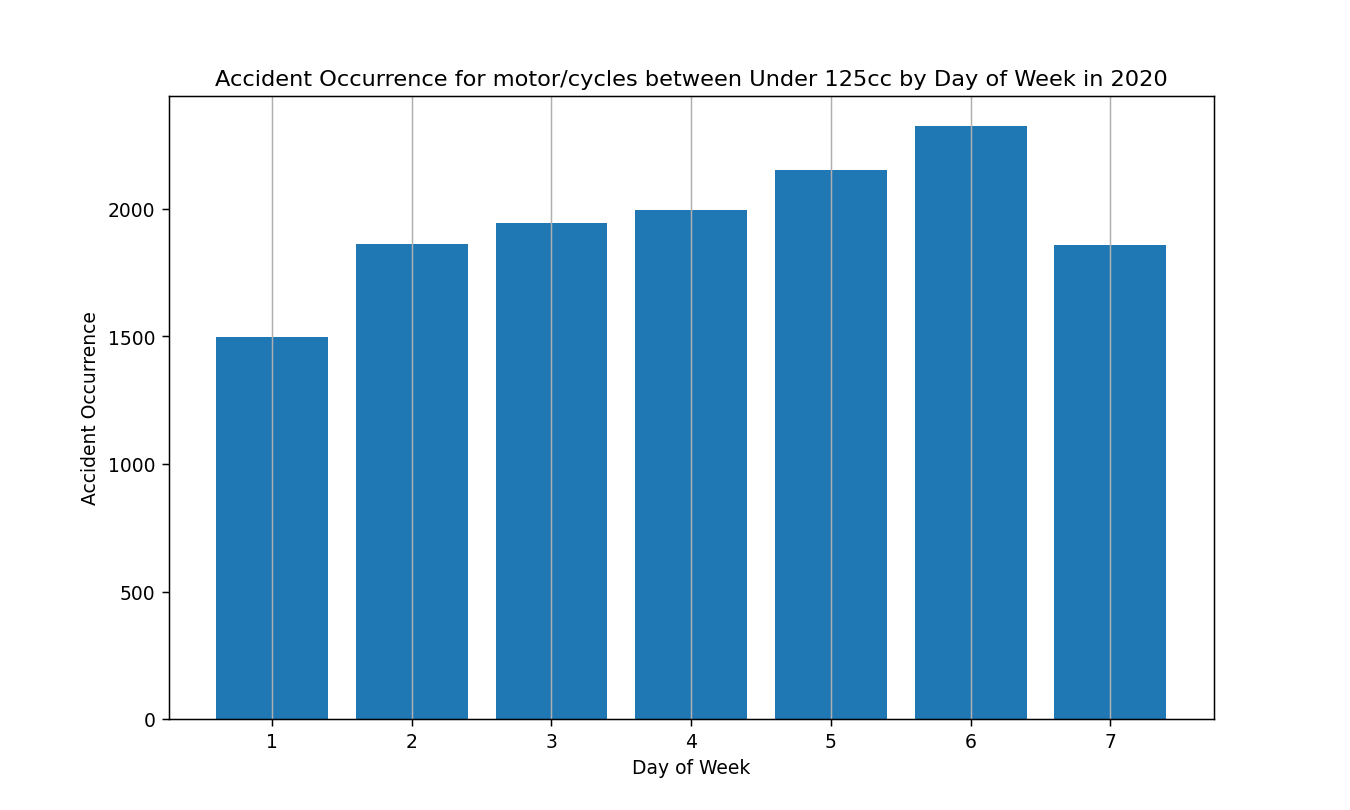

In [ ]:
# Creating a bar plot of the accident occurence for motor/cycles between 50cc & 250cc against the days of the week
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.bar(mbike_under_125_day_df['day_of_week'], mbike_under_125_day_df['Accident_Occurence'])
plt.xlabel('Day of Week')
plt.ylabel('Accident Occurrence')
plt.title('Accident Occurrence for motor/cycles between Under 125cc by Day of Week in 2020')
plt.grid(axis = 'x')

plt.show()

### Under 125cc Motorcycle Accident Trends By Days Of The Week

- Accident occurences involving motorcycles with engine size of 125cc and below increases progressively from Sunday to Friday before dropping slightly on Saturday.
- The highest number of accident occurences involving motorcycles with an engine size of 125cc and below was 2,325 on Fridays and least at 1,496 on Sundays

In [ ]:
#Selecting hours of the day and the accident occurences within these hours for accidents involving motorcycles between 125cc & 500cc from the accident table
mbike125_acc_query_hr = """SELECT SUBSTR(time, 1, 2) AS hour_of_day,
                COUNT(accident.accident_index) AS Accident_Occurence
                FROM accident
                JOIN vehicle ON vehicle.accident_index = accident.accident_index
                WHERE accident.accident_year = 2020 AND vehicle.vehicle_type = 04
                GROUP BY hour_of_day
                ORDER BY Accident_Occurence DESC"""
mbike125_acc_query_df_hr = pd.read_sql_query(mbike125_acc_query_hr, con)
mbike125_acc_query_df_hr

hour_of_day  Accident_Occurence
0           17                 175
1           16                 157
2           15                 151
3           14                 131
4           18                 128
5           13                 122
6           19                  93
7           12                  93
8           20                  82
9           07                  77
10          11                  70
11          10                  67
12          08                  62
13          21                  56
14          09                  54
15          22                  38
16          06                  35
17          23                  34
18          01                  18
19          00                  17
20          05                  13
21          04                   9
22          03                   5
23          02                   4

<IPython.core.display.Javascript object>


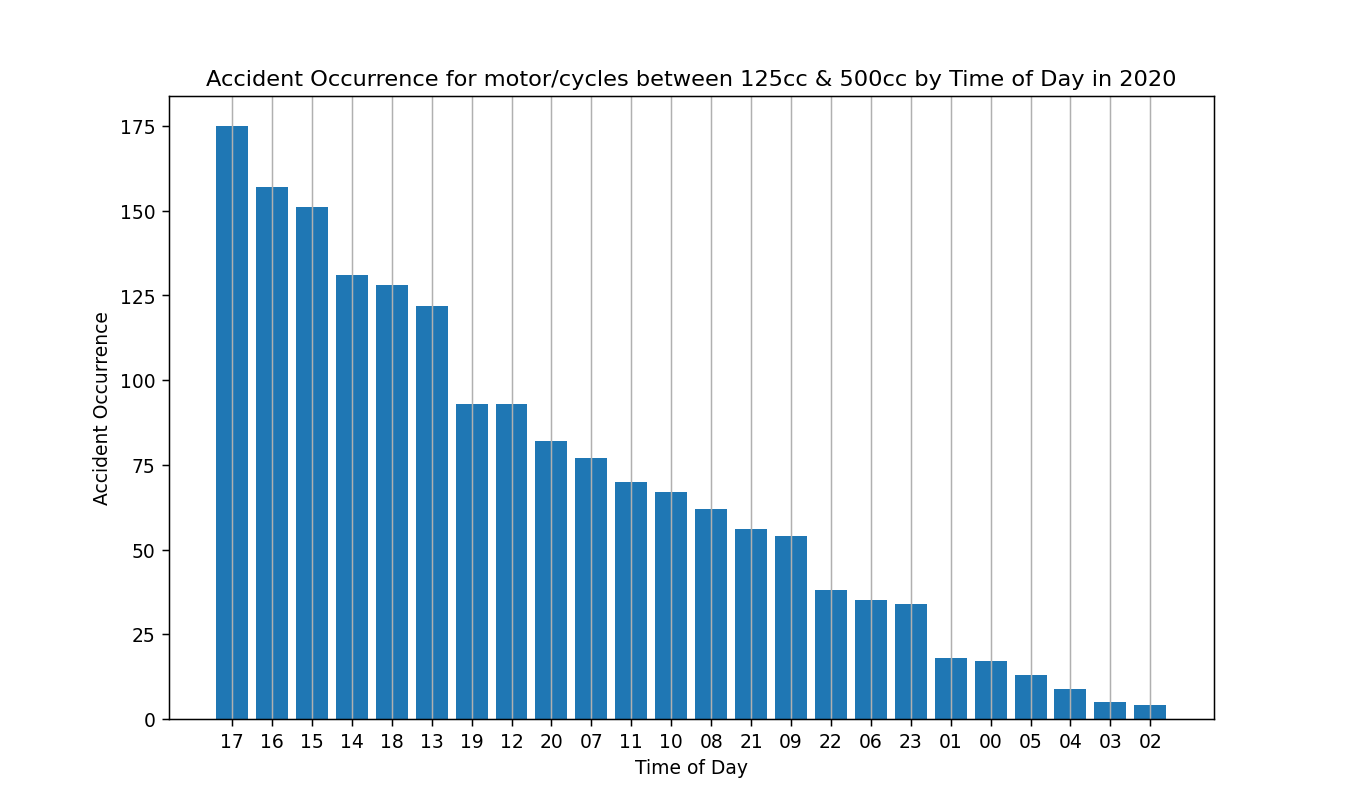

In [ ]:
# Creating a bar plot of the accident for motor/cycles between 250cc & 500cc occurence against the hours of the day
plt.figure(figsize=(10, 6))
plt.bar(mbike125_acc_query_df_hr['hour_of_day'], mbike125_acc_query_df_hr['Accident_Occurence'])
plt.xlabel('Time of Day')
plt.ylabel('Accident Occurrence')
plt.title('Accident Occurrence for motor/cycles between 125cc & 500cc by Time of Day in 2020')
plt.grid(axis='x')
plt.show()

### 125cc - 500cc Motorcycle Accident Trends By Hours Of The Day

- The trend in the accidents involving motorcycles of engine size 125cc to 500cc is quite similar to the trend in the 50cc to 125cc engine size.
- There is a significant drop in the number of accident occurences involving 125cc - 500cc motorcycles when compared to 50cc - 125cc motorcycle.
- The highest number of accident occurences were recorded at 1700, 1600 and 1500 hours with 175, 157 and 151 accident occurences respectively.
- The least number of accidents were recorded at 0200, 0300 and 0400 hours with 4, 5 and 9 accident occurences respectively

In [ ]:
#Selecting days of the week and the accident occurences for motor/cycles between 125cc & 500cc on these days from the accident table
mbike125_acc_query_day = """SELECT day_of_week, COUNT(accident.accident_index) AS Accident_Occurence
                FROM accident
                JOIN vehicle ON vehicle.accident_index = accident.accident_index
                WHERE accident.accident_year = 2020 AND vehicle.vehicle_type = 04
                GROUP BY day_of_week
                ORDER BY Accident_Occurence DESC"""
mbike125_acc_query_df_day = pd.read_sql_query(mbike125_acc_query_day, con)

mbike125_acc_query_df_day

day_of_week  Accident_Occurence
0            6                 267
1            5                 257
2            4                 251
3            7                 237
4            3                 234
5            2                 227
6            1                 218

<IPython.core.display.Javascript object>


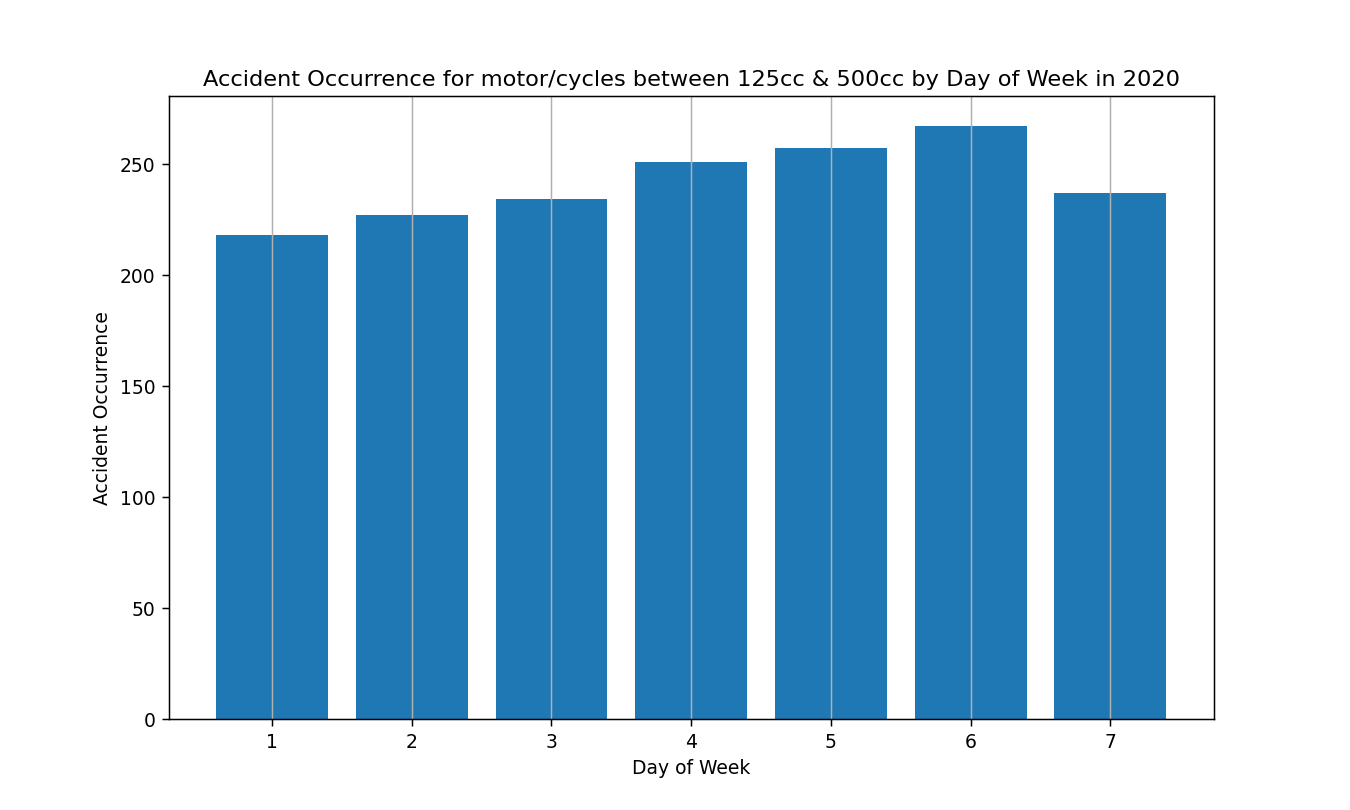

In [ ]:
# Creating a bar plot of the accident occurence for motor/cycles between 50cc & 250cc against the days of the week
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.bar(mbike125_acc_query_df_day['day_of_week'], mbike125_acc_query_df_day['Accident_Occurence'])
plt.xlabel('Day of Week')
plt.ylabel('Accident Occurrence')
plt.title('Accident Occurrence for motor/cycles between 125cc & 500cc by Day of Week in 2020')
plt.grid(axis = 'x')

plt.show()

### 125cc - 500cc Motorcycle Accident Trends By Days Of The Week

- From the bar plot above, it can be observed that the rate of accident occurence in 125cc - 500cc motorcycles increase from 218 occurences on Sunday to 267 on Friday
- The highest accident rates are therefore recorded on Fridays and the least on Sundays
- Rate of accident occurences dropped from 267 on friday to 237 on Saturday.

In [ ]:
#Selecting hours of the day and the accident occurences within these hours for accidents involving motorcycles above 500cc from the accident table
mbike500_acc_query_hr = """SELECT SUBSTR(time, 1, 2) AS hour_of_day,
                COUNT(accident.accident_index) AS Accident_Occurence
                FROM accident
                JOIN vehicle ON vehicle.accident_index = accident.accident_index
                WHERE accident.accident_year = 2020 AND vehicle.vehicle_type = 05
                GROUP BY hour_of_day
                ORDER BY Accident_Occurence DESC"""
mbike500_acc_query_df_hr = pd.read_sql_query(mbike500_acc_query_hr, con)
mbike500_acc_query_df_hr

hour_of_day  Accident_Occurence
0           17                 421
1           16                 366
2           15                 336
3           14                 323
4           13                 323
5           12                 275
6           11                 258
7           18                 242
8           07                 180
9           10                 175
10          19                 163
11          08                 133
12          09                 123
13          20                 112
14          06                  91
15          21                  83
16          22                  56
17          05                  44
18          23                  33
19          01                  17
20          00                  11
21          02                   8
22          03                   7
23          04                   4

<IPython.core.display.Javascript object>


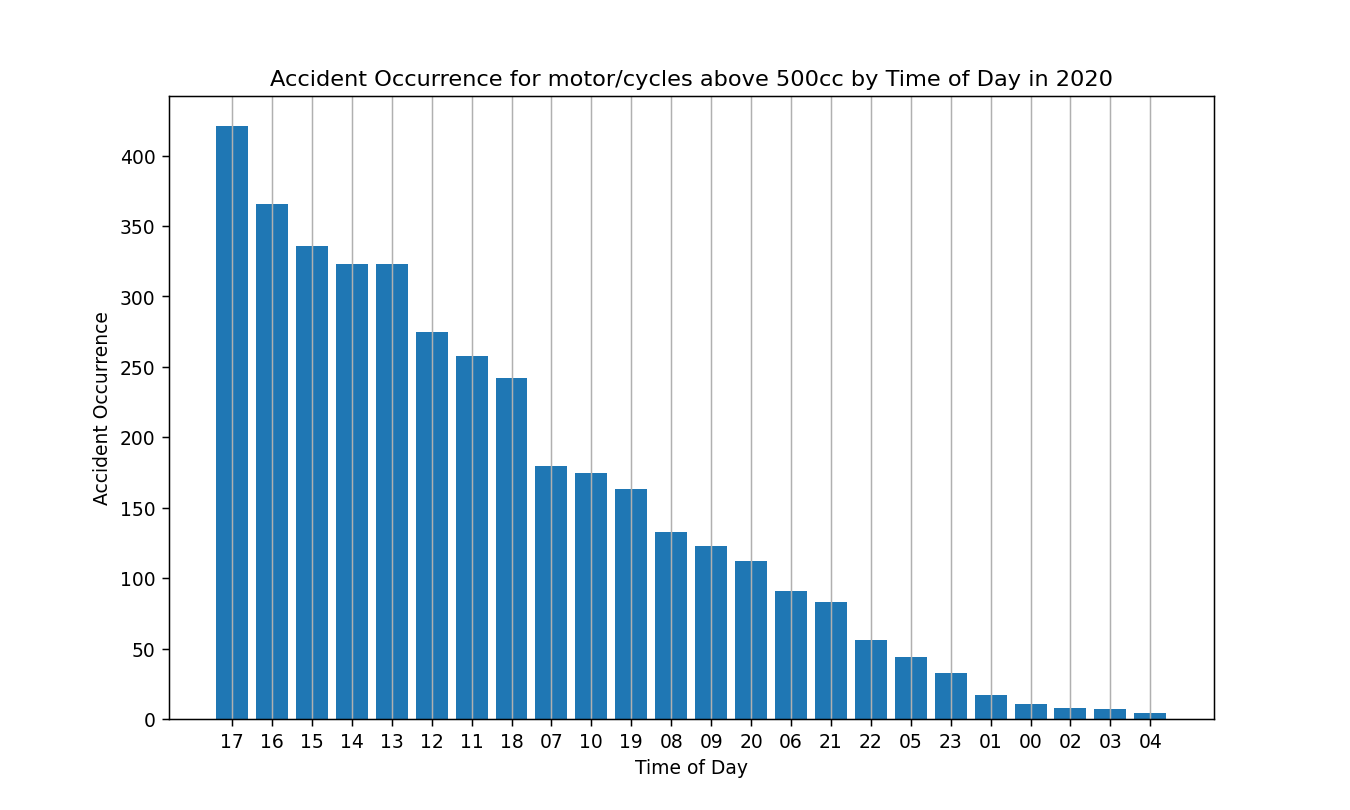

In [ ]:
# Creating a bar plot of the accident for motor/cycles between 250cc & 500cc occurence against the hours of the day
plt.figure(figsize=(10, 6))
plt.bar(mbike500_acc_query_df_hr['hour_of_day'], mbike500_acc_query_df_hr['Accident_Occurence'])
plt.xlabel('Time of Day')
plt.ylabel('Accident Occurrence')
plt.title('Accident Occurrence for motor/cycles above 500cc by Time of Day in 2020')
plt.grid(axis='x')
plt.show()

### Over 500cc Motorcycle Accident Trends By Hours Of The Day

- Accidents involving motorcycles of size 500cc and above increased significantly compare to accidents involving motorcycles of 125cc - 500cc, but not as much as accidents involving motocycles with engine size between 50cc and 125cc.
- The highest accident occurences were also observed at 1700, 1600 and 1500 hours with 421, 366 and 336 occurences respectively.
- The least accident occurences were recorded at 0400, 0300 and 0200 with 4, 7 and 8 accident occurences respectively


In [ ]:
#Selecting days of the week and the accident occurences for motor/cycles above 500cc on these days from the accident table
mbike500_acc_query_day = """SELECT day_of_week, COUNT(accident.accident_index) AS Accident_Occurence
                FROM accident
                JOIN vehicle ON vehicle.accident_index = accident.accident_index
                WHERE accident.accident_year = 2020 AND vehicle.vehicle_type = 05
                GROUP BY day_of_week
                ORDER BY Accident_Occurence DESC"""
mbike500_acc_query_df_day = pd.read_sql_query(mbike500_acc_query_day, con)

mbike500_acc_query_df_day

day_of_week  Accident_Occurence
0            1                 675
1            6                 567
2            7                 550
3            5                 526
4            4                 501
5            3                 497
6            2                 468

<IPython.core.display.Javascript object>


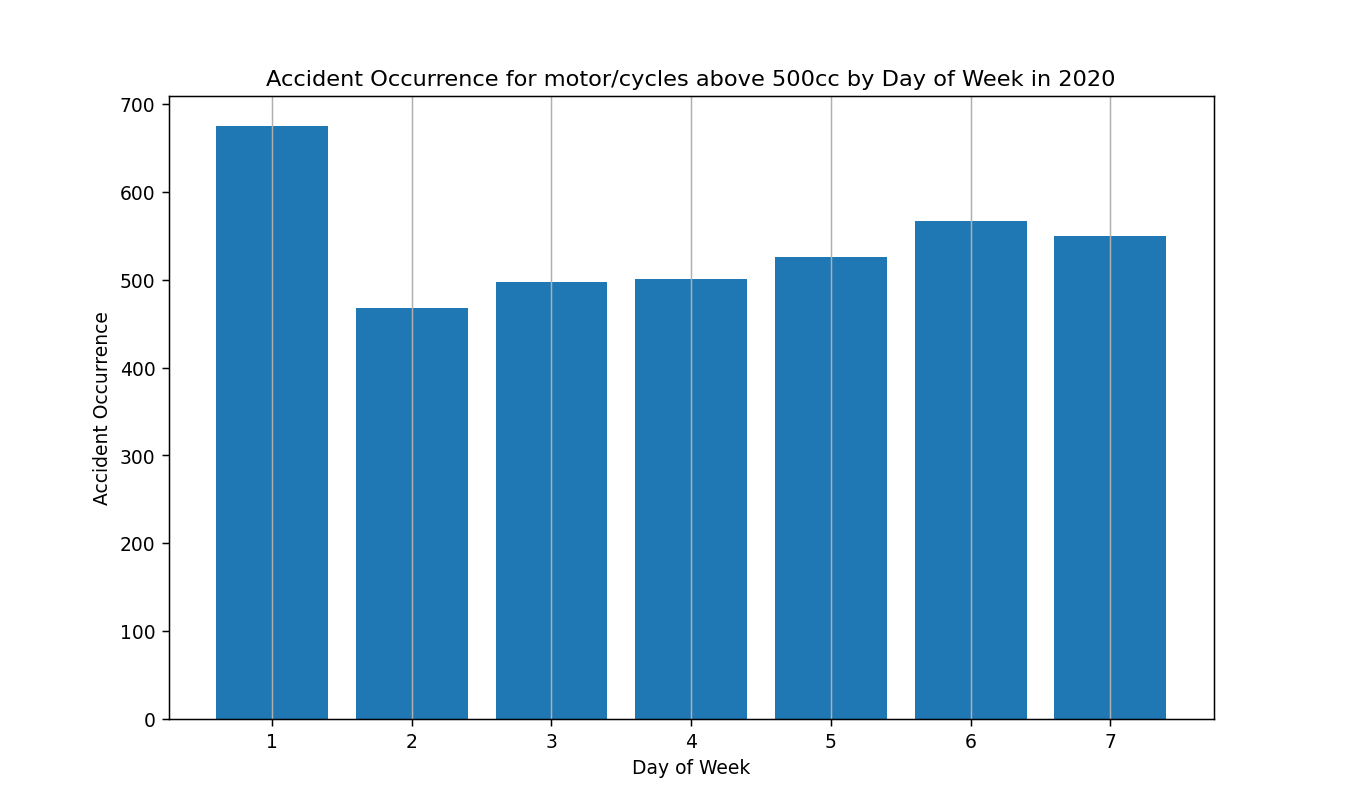

In [ ]:
# Creating a bar plot of the accident occurence for motor/cycles above 500cc against the days of the week
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.bar(mbike500_acc_query_df_day['day_of_week'], mbike500_acc_query_df_day['Accident_Occurence'])
plt.xlabel('Day of Week')
plt.ylabel('Accident Occurrence')
plt.title('Accident Occurrence for motor/cycles above 500cc by Day of Week in 2020')
plt.grid(axis = 'x')

plt.show()

### Over 500cc Motorcycle Accident Trends By Days Of The Week
- From the bar plot above, it can be observed that the rate of accident occurence in over 500cc motorcycles increase from Monday to Friday and not from Sunday to Friday as seen in other classes of motorcycles
- The least accident occurence in a day was recorded on Monday at 468 and highest on Sunday at 675 accident occurences
- There was a slight drop in accident rate from Friday at 567 to Saturday at 550

# Running a query on the database to determine the significant hours of the day and days of the week that pedestrians a most predesposed to being involved in accidents

In [ ]:
#Selecting hours of the day and the accident occurences within these hours for accidents involving pedestrians from the accident table
ped_acc_query_hr = """SELECT SUBSTR(time, 1, 2) AS hour_of_day,
                COUNT(accident.accident_index) AS Accident_Occurence
                FROM accident
                JOIN casualty ON casualty.accident_index = accident.accident_index
                WHERE accident.accident_year = 2020 AND casualty.casualty_class = 03
                GROUP BY hour_of_day
                ORDER BY Accident_Occurence DESC"""
ped_acc_query_df_hr = pd.read_sql_query(ped_acc_query_hr, con)
ped_acc_query_df_hr

hour_of_day  Accident_Occurence
0           15                1672
1           16                1323
2           17                1274
3           18                1146
4           08                1060
5           14                1015
6           13                 833
7           19                 824
8           12                 809
9           11                 725
10          10                 644
11          09                 607
12          20                 518
13          07                 514
14          21                 412
15          22                 365
16          23                 230
17          06                 173
18          00                 173
19          01                 144
20          02                  83
21          03                  82
22          05                  74
23          04                  50

<IPython.core.display.Javascript object>


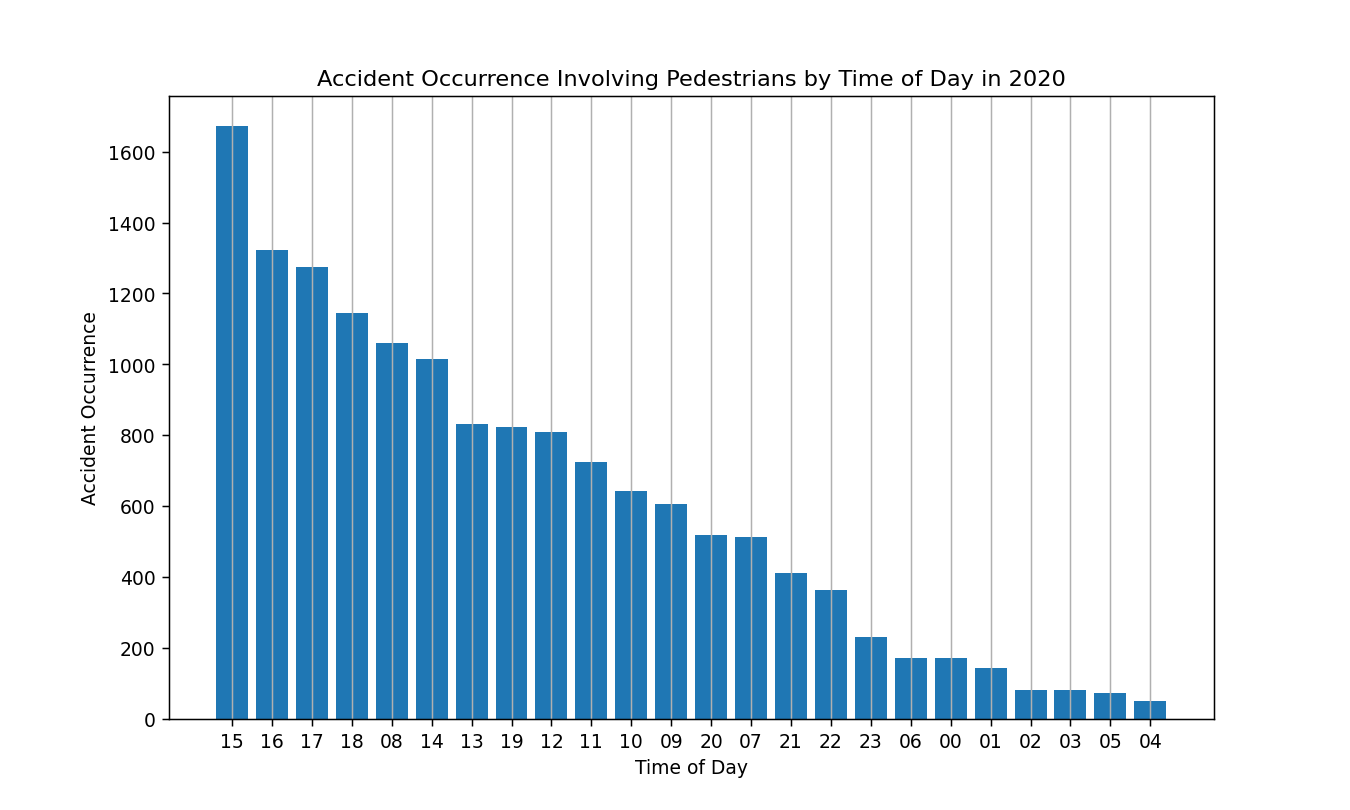

In [ ]:
# Creating a bar plot of the accidents involving pedestrians against the hours of the day
plt.figure(figsize=(10, 6))
plt.bar(ped_acc_query_df_hr['hour_of_day'], ped_acc_query_df_hr['Accident_Occurence'])
plt.xlabel('Time of Day')
plt.ylabel('Accident Occurrence')
plt.title('Accident Occurrence Involving Pedestrians by Time of Day in 2020')
plt.grid(axis='x')
plt.show()

### Pedestrian Accident Trends By Hours Of The Day

- Like the general accidents, accidents involving pedestrian occurs at every hour of the day.
- The hours of 1500, 1600 and 1700 had the highest records of accidents involving pedestrians at 1,672, 1,323 and 1,274 respectively.
- The occurence of pedestrian accidents reaches the heighest by 1500 at 1,672 from where it progressively drops to 173 by 0000
- The hours of 0400, 0500 and 0300 had the lowest records of accidents involving pedestrians at 50, 74 and 82 respectively
- 0800 hours seems to be the most dangerous hour of the morning for pedestrians with an average of 1,060 accident occurences within this hour involving pedestrians

In [ ]:
#Selecting days of the week and the accident occurences for accidents involving pedestrians on these days from the accident table
ped_acc_query_day = """SELECT day_of_week, COUNT(accident.accident_index) AS Accident_Occurence
                FROM accident
                JOIN casualty ON casualty.accident_index = accident.accident_index
                WHERE accident.accident_year = 2020 AND casualty.casualty_class = 03
                GROUP BY day_of_week
                ORDER BY Accident_Occurence DESC"""
ped_acc_query_df_day = pd.read_sql_query(ped_acc_query_day, con)

ped_acc_query_df_day

day_of_week  Accident_Occurence
0            6                2543
1            5                2366
2            3                2267
3            4                2247
4            2                2207
5            7                1878
6            1                1242

<IPython.core.display.Javascript object>


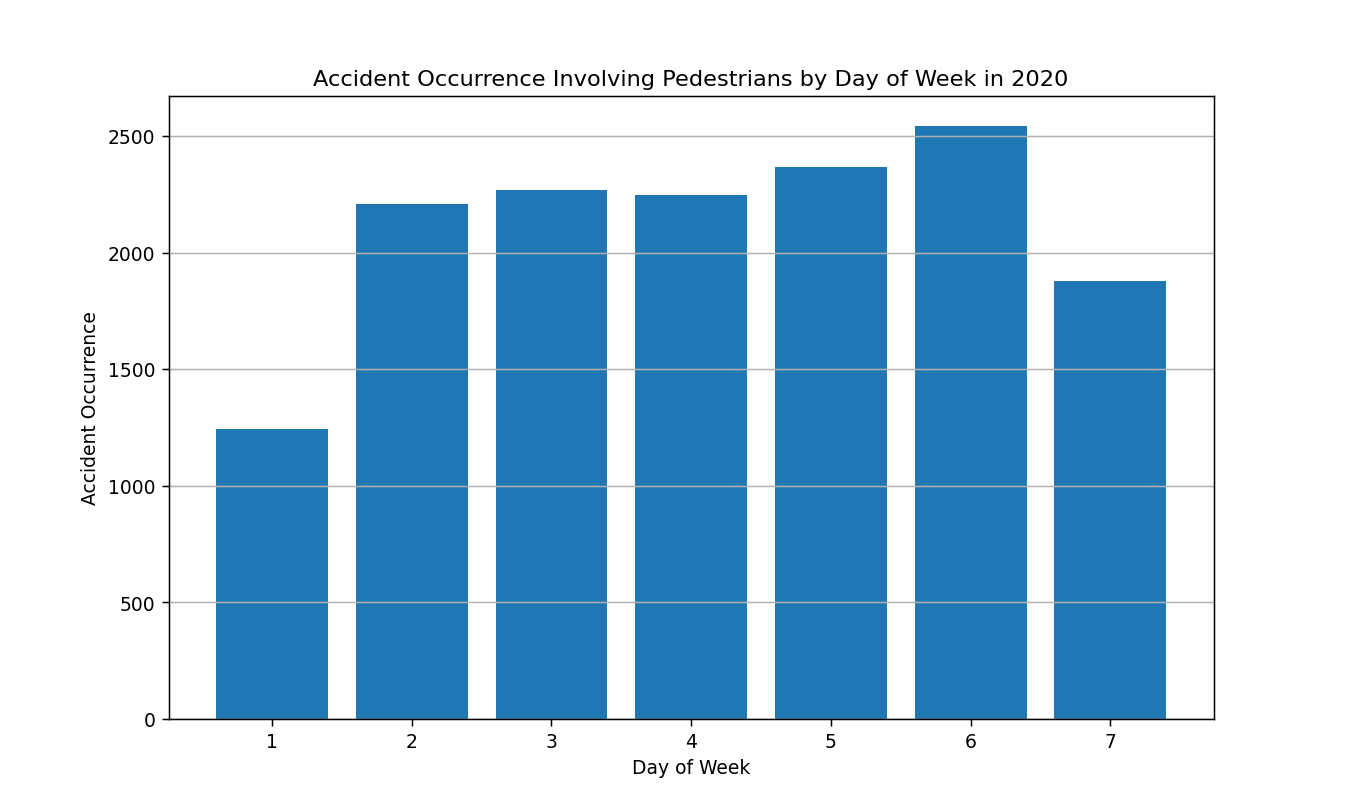

In [ ]:
# Creating a bar plot of the accident occurence for accidents involving pedestrians against the days of the week
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.bar(ped_acc_query_df_day['day_of_week'], ped_acc_query_df_day['Accident_Occurence'])
plt.xlabel('Day of Week')
plt.ylabel('Accident Occurrence')
plt.title('Accident Occurrence Involving Pedestrians by Day of Week in 2020')
plt.grid(axis = 'y')

plt.show()

### Pedestrian Accident Trends By Days Of The Week
- The days with the highest occurence of accidents involving pedestrians were Fridays and Thursday at 2,543 and 2,366 accident occurencies respectively.
- The least accidents involving pedestrians happen on Sundays and Saturdays at 1,242 and 1,878 respectively

# Exploring the impact of select features on the severity of accidents using Apriori Algorithm

### Selecting features that might be of importance to determining severity of accidents from each of the table;

- Accident Table; accident_index, accident_severity, number_of_vehicles, number_of_casualties, hour_of_day, speed_limit, weather_conditions, light_conditions, road_surface_conditions, special_conditions_at_site, carriageway_hazards

- Vehicle Table; accident_index, vehicle_type, towing_and_articulation, skidding_and_overturning, engine_capacity, age_of_vehicle

- Casualty Table; casualty_severity, sex_of_casualty, age_of_casualty, casualty_type

There is a need to subset the various tables using the above selected features. For the accident table however, we would be using the sorted and cleaned dataframe earlier extracted, substring the time column to get the hour_of_day column

#Creating instances of the subset tables using the selected features
accident_df = acc_df_srt[acc_feat]
vehicle_df = veh_df[veh_feat]
casualty_df = cas_df[cas_feat]

In [ ]:
#Merging the subset accident and vehicle tables
acc_veh_df = acc_df_srt.merge(veh_df, on = 'accident_index')

#Further merging the newly merged table with the casualty table
acc_all_df = acc_veh_df.merge(cas_df, on = 'accident_index')

In [ ]:
#Checking the summary of the
acc_all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220435 entries, 0 to 220434
Data columns (total 82 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               220435 non-null  object 
 1   accident_year_x                              220435 non-null  int64  
 2   accident_reference_x                         220435 non-null  object 
 3   location_easting_osgr                        220435 non-null  float64
 4   location_northing_osgr                       220435 non-null  float64
 5   longitude                                    220435 non-null  float64
 6   latitude                                     220435 non-null  float64
 7   police_force                                 220435 non-null  int64  
 8   accident_severity                            220435 non-null  int64  
 9   number_of_vehicles                           220435 non-nul

In [ ]:
#Creating an instance for the selected features that might have impact on accident severity
features = ['accident_index', 'accident_severity', 'hour_of_day', 'speed_limit',
'weather_conditions', 'light_conditions', 'road_surface_conditions',
'carriageway_hazards', 'vehicle_type',
'casualty_severity', 'sex_of_casualty', 'casualty_type']

In [ ]:
#Creating a new dataframe from the previous combined accident dataframe using the selcted columns above
acc_data_feat = acc_all_df[features]

In [ ]:
#Checking the summary of the new dataframe
acc_data_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220435 entries, 0 to 220434
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   accident_index           220435 non-null  object
 1   accident_severity        220435 non-null  int64 
 2   hour_of_day              220435 non-null  int64 
 3   speed_limit              220435 non-null  int64 
 4   weather_conditions       220435 non-null  int64 
 5   light_conditions         220435 non-null  int64 
 6   road_surface_conditions  220435 non-null  int64 
 7   carriageway_hazards      220435 non-null  int64 
 8   vehicle_type             220435 non-null  int64 
 9   casualty_severity        220435 non-null  int64 
 10  sex_of_casualty          220435 non-null  int64 
 11  casualty_type            220435 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 21.9+ MB


- The new dataframe can be seen to contain 220435 rows and 11 columns made up of our selected features
- All the columns are of the integer data type except for the accident_index column that is object type

In [ ]:
#Taking a look at the first 5 rows of the data frame
acc_data_feat.head()

accident_index  accident_severity  hour_of_day  speed_limit  \
0  2020170H10190                  3            8           30   
1  2020170H10190                  3            8           30   
2  2020170H10410                  3           16           40   
3  2020170H10410                  3           16           40   
4  2020170H10410                  3           16           40   

   weather_conditions  light_conditions  road_surface_conditions  \
0                   4                 1                        1   
1                   4                 1                        1   
2                   1                 1                        1   
3                   1                 1                        1   
4                   1                 1                        1   

   carriageway_hazards  vehicle_type  casualty_severity  sex_of_casualty  \
0                    0            19                  3                2   
1                    0             9                  3                2   
2                    0             9                  3                2   
3                    0             9                  3                2   
4                    0             9                  3                2   

   casualty_type  
0              9  
1              9  
2              9  
3              9  
4              9

#### Data Preprocessing
In order to carry out an analysis of our dataframe using Apriori algorithm, there is a need to carry out some data processing. These include;
- Dropping the accident_index coliumn as it is only a unique identifier, and doesn't tell us anything about the accidents
- Converting features in continous forms into categorical variables
- Creating an instance for the categorical columns
- Using the .get_dummies function to carry out one-hot-encoding for the selected variables

In [ ]:
#Dropping the accident_index column
acc_data_feat = acc_data_feat.drop(['accident_index'], axis = 1)

In [ ]:
#Ensuring all columns are categorical data type
acc_data_feat = acc_data_feat.astype('category')

In [ ]:
#Checking the summary of the dataframe after converting to categorical data type
acc_data_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220435 entries, 0 to 220434
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   accident_severity        220435 non-null  category
 1   hour_of_day              220435 non-null  category
 2   speed_limit              220435 non-null  category
 3   weather_conditions       220435 non-null  category
 4   light_conditions         220435 non-null  category
 5   road_surface_conditions  220435 non-null  category
 6   carriageway_hazards      220435 non-null  category
 7   vehicle_type             220435 non-null  category
 8   casualty_severity        220435 non-null  category
 9   sex_of_casualty          220435 non-null  category
 10  casualty_type            220435 non-null  category
dtypes: category(11)
memory usage: 4.0 MB


In [ ]:
#One_hot_encoding the accident dataframe bearing the focus features
acc_data_encoded = pd.get_dummies(acc_data_feat)

In [ ]:
#Checking the encoded dataframe
acc_data_encoded.head()

accident_severity_1  accident_severity_2  accident_severity_3  \
0                    0                    0                    1   
1                    0                    0                    1   
2                    0                    0                    1   
3                    0                    0                    1   
4                    0                    0                    1   

   hour_of_day_0  hour_of_day_1  hour_of_day_2  hour_of_day_3  hour_of_day_4  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   hour_of_day_5  hour_of_day_6  ...  casualty_type_17  casualty_type_18  \
0              0              0  ...                 0                 0   
1              0              0  ...                 0                 0   
2              0              0  ...                 0                 0   
3              0              0  ...                 0                 0   
4              0              0  ...                 0                 0   

   casualty_type_19  casualty_type_20  casualty_type_21  casualty_type_22  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   casualty_type_23  casualty_type_90  casualty_type_97  casualty_type_98  
0                 0                 0                 0                 0  
1                 0                 0                 0                 0  
2                 0                 0                 0                 0  
3                 0                 0                 0                 0  
4                 0                 0                 0                 0  

[5 rows x 113 columns]

#### Applying the apriori algorithm to mine for association rules that applies to our one_hot_encoded dataframe

In [ ]:
#Applying the apriori algorithm to get supported features, using a minimum support threshold of 20%
supported_features = apriori(acc_data_encoded, min_support = 0.2, use_colnames = True)

In [ ]:
#Checking a few rows of the generated itemsets
supported_features.head(20)

support                                          itemsets
0   0.203362                             (accident_severity_2)
1   0.777445                             (accident_severity_3)
2   0.542600                                  (speed_limit_30)
3   0.780888                            (weather_conditions_1)
4   0.710599                              (light_conditions_1)
5   0.206905                              (light_conditions_4)
6   0.685395                       (road_surface_conditions_1)
7   0.293370                       (road_surface_conditions_2)
8   0.966866                           (carriageway_hazards_0)
9   0.718266                                  (vehicle_type_9)
10  0.828067                             (casualty_severity_3)
11  0.625663                               (sex_of_casualty_1)
12  0.367977                               (sex_of_casualty_2)
13  0.588255                                 (casualty_type_9)
14  0.439168             (accident_severity_3, speed_limit_30)
15  0.604246       (accident_severity_3, weather_conditions_1)
16  0.558282         (accident_severity_3, light_conditions_1)
17  0.533726  (accident_severity_3, road_surface_conditions_1)
18  0.225931  (accident_severity_3, road_surface_conditions_2)
19  0.750965      (accident_severity_3, carriageway_hazards_0)

In [ ]:
#Including a column to show the cardinality of the supported features and displaying the first 15 supported itemsets
supported_features['cardinality'] = supported_features['itemsets'].apply(lambda x : len(x))
supported_features.sort_values('support', ascending=False)

support                                           itemsets  cardinality
8    0.966866                            (carriageway_hazards_0)            1
10   0.828067                              (casualty_severity_3)            1
59   0.800100       (carriageway_hazards_0, casualty_severity_3)            2
3    0.780888                             (weather_conditions_1)            1
1    0.777445                              (accident_severity_3)            1
..        ...                                                ...          ...
371  0.202255  (weather_conditions_1, sex_of_casualty_2, vehi...            4
539  0.202168  (road_surface_conditions_1, light_conditions_1...            5
374  0.201048  (weather_conditions_1, casualty_type_9, sex_of...            4
48   0.200835        (light_conditions_4, carriageway_hazards_0)            2
391  0.200091  (carriageway_hazards_0, light_conditions_1, ca...            4

[617 rows x 3 columns]

- At a minimum support of 0.2, the apriori algorithm produced 617 itemsets with good chances of occurence
- The maximum cardinality for the interesting itemset was found to be 8, while the least is 1
- Amongst the itemsets with cardinality 1, carriageway_hazards_0, which stands for accident involving no carriageway hazards had the highest support at 0.97, while casualty_severity_3 connoting slight injuries had a support of 0.83 while weather_condition_1(fine weather without high winds) and accident_severity_3 (slight injury) had a support of 0.78

#### Below is futher minning for interesting relationships from the frequent itemsets obtained from apriori algorithm above. This would then give us a list of more interesting association rules btween the various features in our dataset

In [ ]:
#Generating association rules from apriori obtained itemsets
rules_1 = association_rules(supported_features, metric="lift", min_threshold=0.5)

In [ ]:
#Checking a few rows from the generated association rules
rules_1.head()

antecedents             consequents  antecedent support  \
0   (accident_severity_3)        (speed_limit_30)            0.777445   
1        (speed_limit_30)   (accident_severity_3)            0.542600   
2   (accident_severity_3)  (weather_conditions_1)            0.777445   
3  (weather_conditions_1)   (accident_severity_3)            0.780888   
4   (accident_severity_3)    (light_conditions_1)            0.777445   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.542600  0.439168    0.564887  1.041074  0.017327    1.051220   
1            0.777445  0.439168    0.809377  1.041074  0.017327    1.167518   
2            0.780888  0.604246    0.777221  0.995304 -0.002851    0.983540   
3            0.777445  0.604246    0.773794  0.995304 -0.002851    0.983861   
4            0.710599  0.558282    0.718099  1.010554  0.005831    1.026605   

   zhangs_metric  
0       0.177275  
1       0.086256  
2      -0.020759  
3      -0.021079  
4       0.046928

In [ ]:
#Inserting a column for the cardinlaity of the various fules into the dataframe
rules_1['antecedent_cardinality'] = rules_1['antecedents'].apply(lambda x: len(x))

#### To investigate the impact of other variables on accident severity, the generated rules would be filtered for rules having accident_severity an a consequence and the sorted using the support

In [ ]:
#filtering the association rules for rules with accident_severity_1 as their consequence
rules1_accident_severity1 = rules_1[rules_1["consequents"] == {"accident_severity_1"}]
rules1_accident_severity1

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric, antecedent_cardinality]
Index: []

- The filter applied to the rules to extract rules with accident_severity_1 as consequence returned an empty dataframe, which is an indication that accident_severity_1 rules were not supported by the algorithm

In [ ]:
#filtering the association rules for rules with accident_severity_2 as their consequence
rules1_accident_severity2 = rules_1[rules_1["consequents"] == {"accident_severity_2"}]
rules1_accident_severity2

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric, antecedent_cardinality]
Index: []

- The filter applied to the rules to extract rules with accident_severity_2 as consequence returned an empty dataframe, which is an indication that accident_severity_2 rules were not supported by the algorithm

In [ ]:
#filtering the association rules for rules with accident_severity_3 as their consequence
rules1_accident_severity3 = rules_1[rules_1["consequents"] == {"accident_severity_3"}]
rules1_accident_severity3

antecedents  \
1                                       (speed_limit_30)   
3                                 (weather_conditions_1)   
5                                   (light_conditions_1)   
7                            (road_surface_conditions_1)   
9                            (road_surface_conditions_2)   
...                                                  ...   
12051  (weather_conditions_1, road_surface_conditions...   
12177  (weather_conditions_1, casualty_type_9, light_...   
12303  (weather_conditions_1, road_surface_conditions...   
12430  (road_surface_conditions_1, casualty_type_9, l...   
12682  (weather_conditions_1, road_surface_conditions...   

                 consequents  antecedent support  consequent support  \
1      (accident_severity_3)            0.542600            0.777445   
3      (accident_severity_3)            0.780888            0.777445   
5      (accident_severity_3)            0.710599            0.777445   
7      (accident_severity_3)            0.685395            0.777445   
9      (accident_severity_3)            0.293370            0.777445   
...                      ...                 ...                 ...   
12051  (accident_severity_3)            0.223467            0.777445   
12177  (accident_severity_3)            0.256810            0.777445   
12303  (accident_severity_3)            0.286470            0.777445   
12430  (accident_severity_3)            0.230825            0.777445   
12682  (accident_severity_3)            0.219108            0.777445   

        support  confidence      lift  leverage  conviction  zhangs_metric  \
1      0.439168    0.809377  1.041074  0.017327    1.167518       0.086256   
3      0.604246    0.773794  0.995304 -0.002851    0.983861      -0.021079   
5      0.558282    0.785650  1.010554  0.005831    1.038280       0.036089   
7      0.533726    0.778714  1.001633  0.000870    1.005736       0.005181   
9      0.225931    0.770122  0.990581 -0.002148    0.968144      -0.013278   
...         ...         ...       ...       ...         ...            ...   
12051  0.207712    0.929497  1.195579  0.033979    3.156660       0.210661   
12177  0.238447    0.928493  1.194289  0.038791    3.112367       0.218896   
12303  0.265271    0.925999  1.191081  0.042556    3.007475       0.224835   
12430  0.214480    0.929189  1.195184  0.035026    3.142954       0.212317   
12682  0.203579    0.929129  1.195106  0.033235    3.140287       0.209061   

       antecedent_cardinality  
1                           1  
3                           1  
5                           1  
7                           1  
9                           1  
...                       ...  
12051                       6  
12177                       6  
12303                       6  
12430                       6  
12682                       7  

[283 rows x 11 columns]

- 283 rules support accident_severity_3 as consequence, having antecedents with cardinalities ranging from 1 - 8

In [ ]:
#Sorting the acident_severity_3 rules using the support column in descending order
rules1_accident_severity3.sort_values('support', ascending = False). head(15)

antecedents  \
15                                (casualty_severity_3)   
11                              (carriageway_hazards_0)   
310        (carriageway_hazards_0, casualty_severity_3)   
3                                (weather_conditions_1)   
190         (weather_conditions_1, casualty_severity_3)   
178       (carriageway_hazards_0, weather_conditions_1)   
1445  (carriageway_hazards_0, weather_conditions_1, ...   
334               (vehicle_type_9, casualty_severity_3)   
13                                     (vehicle_type_9)   
5                                  (light_conditions_1)   
232           (casualty_severity_3, light_conditions_1)   
304             (vehicle_type_9, carriageway_hazards_0)   
1963  (vehicle_type_9, carriageway_hazards_0, casual...   
220         (carriageway_hazards_0, light_conditions_1)   
1669  (carriageway_hazards_0, casualty_severity_3, l...   

                consequents  antecedent support  consequent support   support  \
15    (accident_severity_3)            0.828067            0.777445  0.777445   
11    (accident_severity_3)            0.966866            0.777445  0.750965   
310   (accident_severity_3)            0.800100            0.777445  0.750965   
3     (accident_severity_3)            0.780888            0.777445  0.604246   
190   (accident_severity_3)            0.642961            0.777445  0.604246   
178   (accident_severity_3)            0.759852            0.777445  0.588092   
1445  (accident_severity_3)            0.625677            0.777445  0.588092   
334   (accident_severity_3)            0.611387            0.777445  0.571302   
13    (accident_severity_3)            0.718266            0.777445  0.571302   
5     (accident_severity_3)            0.710599            0.777445  0.558282   
232   (accident_severity_3)            0.592510            0.777445  0.558282   
304   (accident_severity_3)            0.695965            0.777445  0.553143   
1963  (accident_severity_3)            0.592048            0.777445  0.553143   
220   (accident_severity_3)            0.689423            0.777445  0.541098   
1669  (accident_severity_3)            0.574509            0.777445  0.541098   

      confidence      lift  leverage  conviction  zhangs_metric  \
15      0.938867  1.207631  0.133668    3.640483       1.000000   
11      0.776701  0.999043 -0.000719    0.996669      -0.028093   
310     0.938589  1.207275  0.128932    3.624051       0.858870   
3       0.773794  0.995304 -0.002851    0.983861      -0.021079   
190     0.939787  1.208816  0.104380    3.696157       0.483824   
178     0.773956  0.995512 -0.002651    0.984565      -0.018426   
1445    0.939929  1.208999  0.101663    3.704896       0.461817   
334     0.934437  1.201934  0.095983    3.394524       0.432325   
13      0.795391  1.023083  0.012890    1.087709       0.080085   
5       0.785650  1.010554  0.005831    1.038280       0.036089   
232     0.942233  1.211961  0.097639    3.852612       0.429191   
304     0.794785  1.022305  0.012069    1.084501       0.071762   
1963    0.934288  1.201742  0.092858    3.386807       0.411505   
220     0.784857  1.009534  0.005110    1.034451       0.030407   
1669    0.941844  1.211461  0.094449    3.826865       0.410234   

      antecedent_cardinality  
15                         1  
11                         1  
310                        2  
3                          1  
190                        2  
178                        2  
1445                       3  
334                        2  
13                         1  
5                          1  
232                        2  
304                        2  
1963                       3  
220                        2  
1669                       3

In [ ]:
#Sorting the acident_severity_3 rules using the confidence column in descending order
rules1_accident_severity3.sort_values('confidence', ascending = False). head(15)

antecedents  \
4074   (speed_limit_30, road_surface_conditions_1, ca...   
8381   (road_surface_conditions_1, light_conditions_1...   
7946   (weather_conditions_1, road_surface_conditions...   
11295  (weather_conditions_1, road_surface_conditions...   
1109   (speed_limit_30, casualty_severity_3, light_co...   
4134   (speed_limit_30, carriageway_hazards_0, casual...   
3773   (speed_limit_30, casualty_severity_3, weather_...   
8008   (weather_conditions_1, light_conditions_1, spe...   
4224   (speed_limit_30, carriageway_hazards_0, road_s...   
1151   (speed_limit_30, road_surface_conditions_1, ca...   
8132   (weather_conditions_1, road_surface_conditions...   
3863   (speed_limit_30, road_surface_conditions_1, we...   
4164   (vehicle_type_9, speed_limit_30, casualty_seve...   
8443   (light_conditions_1, speed_limit_30, casualty_...   
4013   (speed_limit_30, weather_conditions_1, sex_of_...   

                 consequents  antecedent support  consequent support  \
4074   (accident_severity_3)            0.253254            0.777445   
8381   (accident_severity_3)            0.248323            0.777445   
7946   (accident_severity_3)            0.239395            0.777445   
11295  (accident_severity_3)            0.234922            0.777445   
1109   (accident_severity_3)            0.327566            0.777445   
4134   (accident_severity_3)            0.319051            0.777445   
3773   (accident_severity_3)            0.270787            0.777445   
8008   (accident_severity_3)            0.265289            0.777445   
4224   (accident_severity_3)            0.317218            0.777445   
1151   (accident_severity_3)            0.323701            0.777445   
8132   (accident_severity_3)            0.298641            0.777445   
3863   (accident_severity_3)            0.304439            0.777445   
4164   (accident_severity_3)            0.235729            0.777445   
8443   (accident_severity_3)            0.230095            0.777445   
4013   (accident_severity_3)            0.219802            0.777445   

        support  confidence      lift  leverage  conviction  zhangs_metric  \
4074   0.244108    0.963888  1.239815  0.047217    6.162886       0.259028   
8381   0.239349    0.963865  1.239786  0.046292    6.158979       0.257303   
7946   0.230685    0.963616  1.239466  0.044569    6.116912       0.254010   
11295  0.226362    0.963561  1.239395  0.043723    6.107595       0.252464   
1109   0.315594    0.963452  1.239255  0.060930    6.089450       0.287112   
4134   0.307279    0.963103  1.238805  0.059234    6.031723       0.283091   
3773   0.260762    0.962976  1.238643  0.050240    6.011111       0.264209   
8008   0.255431    0.962841  1.238469  0.049184    5.989331       0.262078   
4224   0.304757    0.960716  1.235735  0.058137    5.665238       0.279394   
1151   0.310958    0.960633  1.235629  0.059298    5.653414       0.281970   
8132   0.286806    0.960368  1.235288  0.054629    5.615579       0.271576   
3863   0.292345    0.960274  1.235167  0.055660    5.602202       0.273725   
4164   0.226339    0.960164  1.235026  0.043072    5.586786       0.248996   
8443   0.220868    0.959898  1.234684  0.041982    5.549770       0.246882   
4013   0.210851    0.959279  1.233888  0.039968    5.465410       0.242955   

       antecedent_cardinality  
4074                        4  
8381                        5  
7946                        5  
11295                       6  
1109                        3  
4134                        4  
3773                        4  
8008                        5  
4224                        4  
1151                        3  
8132                        5  
3863                        4  
4164                        4  
8443                        5  
4013                        4


The above dataframe has been sorted according to the support of the various rules. Apart from the support, attention is also give to the confidence and the lift. These metrices would be briefly defined to give a background on the the relationships and the frequency of their occurence inour accident dataset.

**Support**

This measures the frequency of occurence of each of the antecedent and consequents in the entire dataset. The heigher the support of any rule, the more prevalent it's itemsets are prevalent in the dataset. It is calculated by dividing the frequency of occurence of the antecedent and consequence by the total number of events.

**Confidence**

This measures the relaibility or certainty of the rules in a dataset. It is calculated by dividing the frequency of occurence of the antecedent and consequence occuring together by the frequency of the antecedent. Higher confidence values indicate more reliable associations.

**Lift**

Lift is an indication of the statistical dependence between the itemsets of a rule. Lift of value greater than one indicates a positive relationship between the antecedent and the consequent, lift of less than one is an indication of negative relationship between the itemsets, while a lift of one is an indication of no relationship between both. Lift is calculated by dividing the support of both antecedent and consequence by the multiplication of both their individual supports

Accident severity 3 being the most frequently occuring form of accident severity reported, has the following relationships with other features in the data;

- Casualty_severity_3; This connotes accident casualties sustaining only slight injuries, had the highest frequency of occurence with accident_severity_3, having a support value of 0.78 and a confidence of 0.94. Thius means that 94% of the times that slight casualty injuries are recorded, thae accident is an accident_severity_3 accident, and shows a lift of 1.2, which indicates that both accident_severity_3 and casualty_severity_3 have positive relationship between them.
- Carriageway_hazards_0; This connotes the existence of no hazards in the carriage way with a support of 0.75, and a confidence of 0.78. This means that 78% of the times when there are no additional harzards in the carriageway (as antecedent) when an accident occurs, the accident would be an accident_severity_3 accident. This rule however has a lift of 0.99, which is indicative of a near independent relationship between carriageway_hazard_0 as antecedent and accident_severity_3 as consequent and cardinality of one on both sides
- Having cardinality 2 with carriageway_hazard_0 and casualty_severity_3 as antecedents, we get a support of 0.75 and a confidence of 0.94, which means that 94% of the times we have this antecedents with an accident occurence, the accident would be an accident_severity_3 accident. A lift of 1.2 also indicates a positive relationship between these 2 antecedents and accident_severity_3 as the consequence
- The most frequent weather condition occuring with accident_severity_3 is weatrher_condition_1, connoting fine weather without high winds. With a cardinality of 1, it comes with a support of 0.60, a confidence of 0.77 and a lift of 0.99, this is indicative that 77% of the times an accident occurs in a fine weather condition, the accident would be an accident_severity_3 accident. The lift however shows a near independent relationship between the two, despite thefrequency of their occurence. With a cardinality of two along with casualty_severity_3, we however have the same 0.66 support, a higher confidence of 0.94, but an also near independent relationship with a lift of 0.99.
- Vehicle_type_9 which represent cars showed the highest frequency of occurence with accident_severity_3, with a support of 0.57, a confidence of 0.80 and a left of 1.1 which means that 80% of times that accidents occurs involving regular cars, the accident severity would be slight and the lift indicates a weak possitive relationship. When vehicle_type_9 has a cardinality of 2 with casualty_severity_3, the confidence increases to 0.93, with the same support of 0.57 and a lift of 1.2.
- In line with our earlier observation that accidents occur mostly between the late mornings and the early evenings, light_conditions_1, which connotes daylight, can be seen to have the highest light conditions support with accident_sevedrity_3 as consequence. It has a support of 0.56, a confidence of 0.79 and a lift of 1.04, which indicates that 79% of the times that an accident occurs in the daytime, it would be an accident_severity_3 accident, and a lift of 1.04 shows a weak positive relationship. Having a cardinality of 2 along with casualty_severity_3 the confidence goes up to 0.94, and the lift improves to 1.2.

From the above rules, we observe that the most frequent conditions associated with accidents are; No carriageway hazards, Fine weather conditions, daylight and Normal passanger cars (taxis, estate cars, three and four wheel cars and minibuses). This explains why most of the accidents recorded were associated with slight or minor injuries as these conditions portend no aparent threats or dangers to road users.

 **To do an analysis of accidents in Humberside regions, the data would be filtered using the police_force column. This gives accident incidences in Kingston Upon Hull, East Ridding of Yorkshire, North Loincolnshire and North East Lincolnshire.**

In [ ]:
#Selecting hours of the day and the accident occurences within these hours for the Humberside region
humb_acc_query = """SELECT accident.*, lsoa.*
                FROM accident
                JOIN lsoa ON lsoa.lsoa01cd = accident.lsoa_of_accident_location
                WHERE accident.accident_year = 2020 AND accident.police_force = 16
                """
humb_acc_df = pd.read_sql_query(humb_acc_query, con)

In [ ]:
#Checking the first few rows of the humberside dataframe
humb_acc_df.head()

accident_index  accident_year accident_reference  location_easting_osgr  \
0  2020160914930           2020          160914930               506050.0   
1  2020160915008           2020          160915008               497660.0   
2  2020160915028           2020          160915028               510449.0   
3  2020160915041           2020          160915041               526236.0   
4  2020160915047           2020          160915047               510322.0   

   location_northing_osgr  longitude   latitude  police_force  \
0                428813.0  -0.393424  53.744936            16   
1                402806.0  -0.528743  53.512895            16   
2                434112.0  -0.324858  53.791630            16   
3                410340.0  -0.095008  53.574501            16   
4                431457.0  -0.327733  53.767805            16   

   accident_severity  number_of_vehicles  ...  \
0                  3                   2  ...   
1                  3                   1  ...   
2                  2                   1  ...   
3                  3                   1  ...   
4                  3                   1  ...   

   did_police_officer_attend_scene_of_accident trunk_road_flag  \
0                                            1               2   
1                                            1               2   
2                                            1               2   
3                                            1               2   
4                                            1               2   

   lsoa_of_accident_location objectid   lsoa01cd  \
0                  E01012777    12777  E01012777   
1                  E01013325    13325  E01013325   
2                  E01012788    12788  E01012788   
3                  E01013220    13220  E01013220   
4                  E01012817    12817  E01012817   

                       lsoa01nm                     lsoa01nmw   shape__area  \
0       Kingston upon Hull 028E       Kingston upon Hull 028E  3.567509e+05   
1       North Lincolnshire 022C       North Lincolnshire 022C  2.922303e+07   
2       Kingston upon Hull 002E       Kingston upon Hull 002E  4.380009e+05   
3  North East Lincolnshire 003C  North East Lincolnshire 003C  9.608273e+05   
4       Kingston upon Hull 016D       Kingston upon Hull 016D  1.798393e+06   

   shape__length                              globalid  
0    3963.099631  4c068a55-c2d9-426c-9cfa-94742ef4a3ff  
1   35402.961317  7ef78052-d8cd-44b7-83fe-911922ac653e  
2    4731.122554  3976daa3-b707-42ec-80fd-cc3ee771e32f  
3    7574.743799  3fd9635e-6911-4973-93f9-d797fcda91ae  
4    7836.548217  d1883eb3-b8e3-47f3-97ab-f33ce4bad217  

[5 rows x 43 columns]

In [ ]:
#Creating a dataframe using the gps coordinates of our accident locations
X = humb_acc_df[['longitude', 'latitude']]
X

longitude   latitude
0     -0.393424  53.744936
1     -0.528743  53.512895
2     -0.324858  53.791630
3     -0.095008  53.574501
4     -0.327733  53.767805
...         ...        ...
1658  -0.651104  53.566753
1659  -0.424674  53.839482
1660  -0.308880  53.782750
1661  -0.703181  53.569801
1662  -0.342063  53.742609

[1663 rows x 2 columns]

In [ ]:
#Determining the optimum number of clusters for clustering

sum_sq_dist = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, n_init = 10)
    kmeans.fit(X)
    sum_sq_dist.append(kmeans.inertia_)

<IPython.core.display.Javascript object>


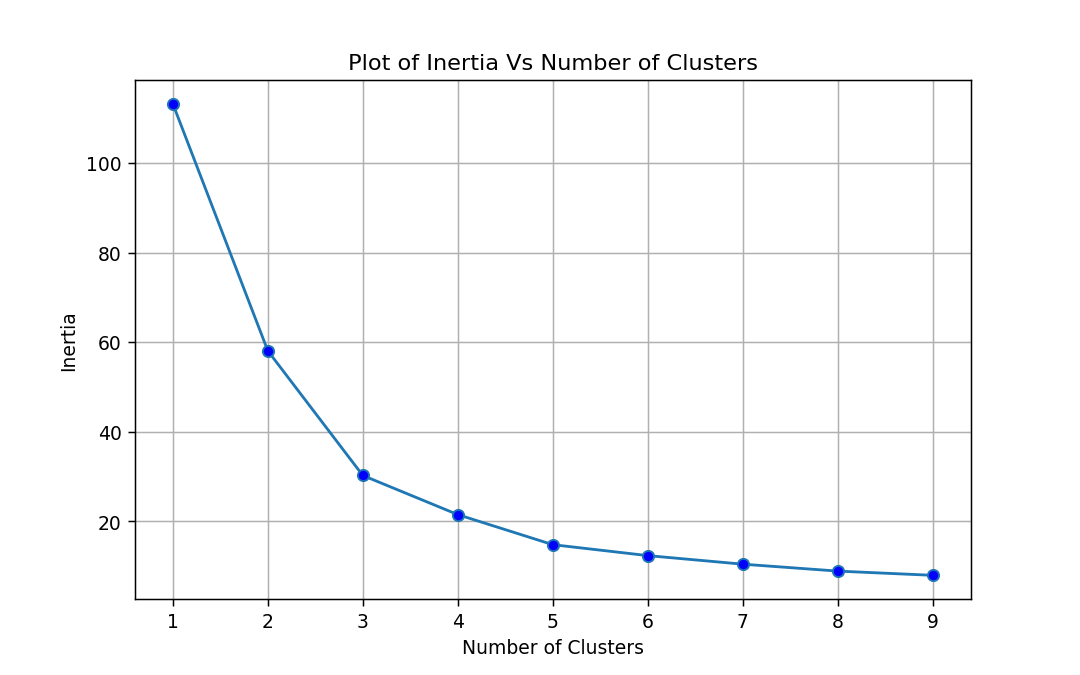

In [ ]:
#Creating a plot of the sum of squared distance of the data points to their centroids to visualize the elbow point

plt.figure(figsize = (8, 5))
plt.plot(range(1, 10), sum_sq_dist, marker = 'o', linestyle = '-', markerfacecolor = 'blue')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Plot of Inertia Vs Number of Clusters')
plt.grid(True)
plt.show()

In [ ]:
#Creating k-means clustering on the accident location coordinates
kmeans = KMeans(n_clusters = 4 , random_state = 0)
kmeans.fit(X)
kmeans

KMeans(n_clusters=4, random_state=0)

In [ ]:
#Creating instances for the prediction of cluster assignments for the datapoints and their centroids
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

In [ ]:
labels

array([0, 2, 0, ..., 0, 2, 0])

In [ ]:
#Assigning cluster labels to the vatious data points
X['clusters'] = labels

In [ ]:
#Checking a few rows from the accident location dataframe
X.head()

longitude   latitude  clusters
0  -0.393424  53.744936         0
1  -0.528743  53.512895         2
2  -0.324858  53.791630         0
3  -0.095008  53.574501         1
4  -0.327733  53.767805         0

In [ ]:
centroids

array([[-0.36418796, 53.756367  ],
       [-0.09147249, 53.57621063],
       [-0.71434247, 53.66534987],
       [-0.2715766 , 54.0433033 ]])

In [ ]:
#Creating a scattewr plot to visualize the distribution of accident in the Humber rigion
fig = plt.figure(figsize = (8, 8))
colmap = {1: 'r', 2: 'b', 3: 'g', 4: 'purple'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(X['longitude'], X['latitude'], color = colors)

plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'o', color = 'Orange', s = 100)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Accident Distribution In The Humber Regions')

plt.show()

<IPython.core.display.Javascript object>

#### To better understand the distribution of the accidents in the humber region better, we would be using the Folium library to create a map using the longitude, latitude, and the cluster points from our location dataframe X.

In [ ]:
#Importing the folium library
import folium

In [ ]:
#Creating a map to visualize the accidents in the Humber rigion

#Creating an instance for the colors to be used in identifying the cluster markers
colors = ['red', 'blue', 'green', 'purple']


# Creating the map center using the first row of or location dataframe
latitude = X.iloc[0]['latitude']
longitude = X.iloc[0]['longitude']
hum_map = folium.Map(location=[latitude, longitude], zoom_start=9)

# creating markers for each data point in our dataFrame
for _, row in X.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=2,
        weight=0.5,
        fill=True,
        fill_color=colors[int(row['clusters'])],
        color=colors[int(row['clusters'])]
    ).add_to(hum_map)


hum_map


In [ ]:
#Selecting accident occurences in the various locations from the accident table
local_authority_query = """SELECT local_authority_ons_district, COUNT(accident.accident_index) AS Accident_Occurence
                FROM accident
                WHERE accident.accident_year = 2020
                AND local_authority_ons_district IN ('E06000010', 'E06000011', 'E06000012', 'E06000013')
                GROUP BY local_authority_ons_district
                ORDER BY Accident_Occurence DESC"""
local_authority_df = pd.read_sql_query(local_authority_query, con)
local_authorities = ['Kingston upon Hull, City of', 'East Riding of Yorkshire', 'North Lincolnshire', 'North East Lincolnshire']
local_authority_df['Local_Authorities'] = local_authorities
local_authority_df

local_authority_ons_district  Accident_Occurence  \
0                    E06000010                 603   
1                    E06000011                 495   
2                    E06000013                 306   
3                    E06000012                 305   

             Local_Authorities  
0  Kingston upon Hull, City of  
1     East Riding of Yorkshire  
2           North Lincolnshire  
3      North East Lincolnshire

<IPython.core.display.Javascript object>


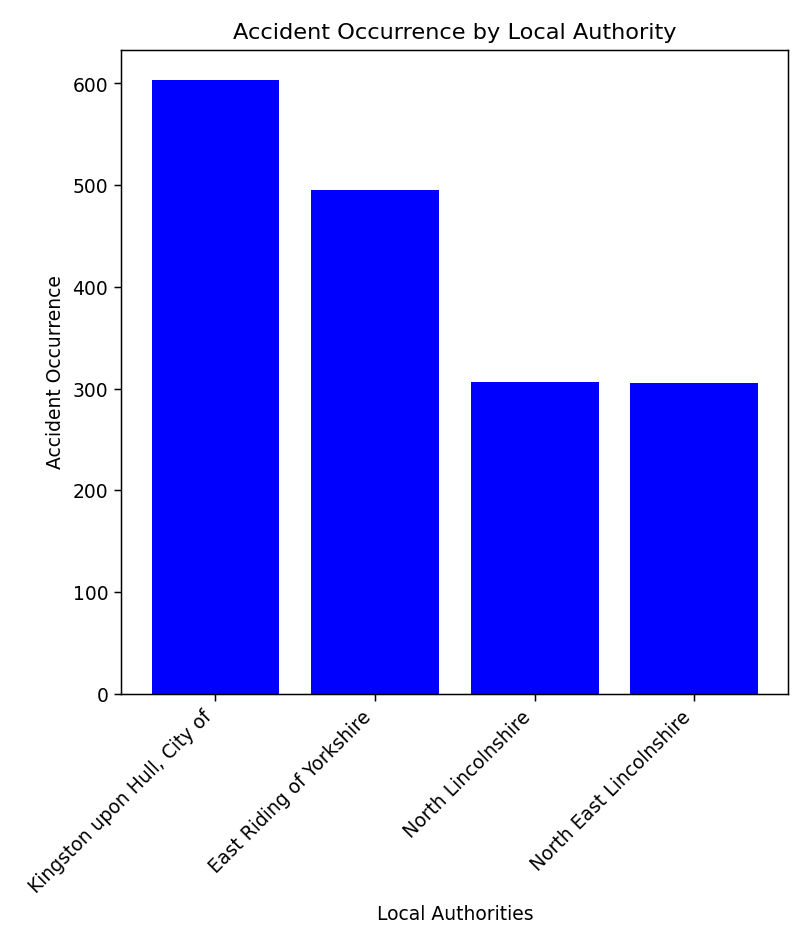

In [ ]:
#Craeting a bar plot to show accident distribution in the humber region
data = [
    {"local_authority_ons_district": "E06000010", "Accident_Occurence": 603, "Local_Authorities": "Kingston upon Hull, City of"},
    {"local_authority_ons_district": "E06000011", "Accident_Occurence": 495, "Local_Authorities": "East Riding of Yorkshire"},
    {"local_authority_ons_district": "E06000013", "Accident_Occurence": 306, "Local_Authorities": "North Lincolnshire"},
    {"local_authority_ons_district": "E06000012", "Accident_Occurence": 305, "Local_Authorities": "North East Lincolnshire"}
]

# Extract data for plotting
local_authorities = [item["Local_Authorities"] for item in data]
accident_occurrences = [item["Accident_Occurence"] for item in data]

plt.figure(figsize=(6,7))
plt.bar(local_authorities, accident_occurrences, color='blue')
plt.xlabel('Local Authorities')
plt.ylabel('Accident Occurrence')
plt.title('Accident Occurrence by Local Authority')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
humb_acc_df['accident_severity'].value_counts()

3    1314
2     317
1      32
Name: accident_severity, dtype: int64

In [ ]:
#Converting the accident severity in to categorical variables

def map_severity(severity):
    if severity == 1:
        return 'Fatal'
    elif severity == 2:
        return 'Serious'
    elif severity == 3:
        return 'Slight'

humb_acc_df['accident_severity'] = humb_acc_df['accident_severity'].apply(map_severity)

In [ ]:
plt.figure(figsize = (10, 5))
accident_severity_plot = sns.countplot( x = 'accident_severity', hue='urban_or_rural_area', data=humb_acc_df, order=['Slight', 'Serious', 'Fatal']
)
plt.xlabel('Acident_severity')
plt.ylabel('Occurence')
plt.title('Plot of Acciedent Severity Occurence')
for p in accident_severity_plot.patches:
    height = p.get_height()
    accident_severity_plot.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}'.format((height/len(humb_acc_df))*100)+'%', ha = 'center')

<IPython.core.display.Javascript object>

From the above, we can clearly see the accident distribution in the various local authorities in the Humber region.
- A dense cluster(red) of accidents can be seen around Hull, which represents the City of Kingston Upon Hull local authority. This also includes locations like Hessle, Barton upon Humber and Beverley recording a total of 603 accidents in the year 2020.
- The purple cluster which consists of town like Hornsea, Bridlington and Driffield. Total accident occurence recorded in this region was 495.
- The green cluster consists of towns like Scunthorpe, Winterton, Crowle, Goole, Howden and Epworth, having a total accident occurence of 306
- The blue cluster consists of Grimsby, Cleethorpes, Immingham and Nunsthorpe having a total accident occurence of 305.

From the above accident occurences, it can be clearly seen that there is a clear correlation between population density and accident occurences in these towns. Which means that the more the population of an area, the more measures needed to be put in place to prevent accidents and ensure public safety

### Outlier Detection

To detect the possible presence of outliers in the data set, all tables would be joined together to include only data from the year 2020

In [ ]:
#Creating a dataframe for 2020 accident data
acc_data = """SELECT accident.*, SUBSTR(time, 1, 2) AS hour_of_day, lsoa.*, vehicle.*, casualty.*
                FROM accident
                JOIN lsoa ON lsoa.lsoa01cd = accident.lsoa_of_accident_location
                JOIN vehicle ON vehicle.accident_index = accident.accident_index
                JOIN casualty ON casualty.accident_index = accident.accident_index
                WHERE accident.accident_year = 2020
                """
acc_data_df = pd.read_sql_query(acc_data, con)

In [ ]:
#Checking the dataframe
acc_data_df.head()

accident_index  accident_year accident_reference  location_easting_osgr  \
0  2020010219808           2020          010219808               521389.0   
1  2020010220496           2020          010220496               529337.0   
2  2020010220496           2020          010220496               529337.0   
3  2020010228005           2020          010228005               526432.0   
4  2020010228006           2020          010228006               538676.0   

   location_northing_osgr  longitude   latitude  police_force  \
0                175144.0  -0.254001  51.462262             1   
1                176237.0  -0.139253  51.470327             1   
2                176237.0  -0.139253  51.470327             1   
3                182761.0  -0.178719  51.529614             1   
4                184371.0  -0.001683  51.541210             1   

   accident_severity  number_of_vehicles  ...  age_band_of_casualty  \
0                  3                   1  ...                     6   
1                  3                   1  ...                     1   
2                  3                   1  ...                     1   
3                  3                   1  ...                     5   
4                  2                   1  ...                     8   

  casualty_severity  pedestrian_location pedestrian_movement  car_passenger  \
0                 3                    9                   5              0   
1                 3                    1                   1              0   
2                 3                    1                   1              0   
3                 3                    5                   9              0   
4                 2                    4                   1              0   

  bus_or_coach_passenger pedestrian_road_maintenance_worker  casualty_type  \
0                      0                                  0              0   
1                      0                                  0              0   
2                      0                                  0              0   
3                      0                                  0              0   
4                      0                                  0              0   

   casualty_home_area_type  casualty_imd_decile  
0                        1                    4  
1                        1                    2  
2                        1                    2  
3                        1                    3  
4                        1                    3  

[5 rows x 91 columns]

In [ ]:
#Creating an insatnce of the numeric variabnles in the dataframe
num_var = acc_data_df.select_dtypes(include = 'number')

In [ ]:
#Checking the numeric dataframe
num_var

accident_year  location_easting_osgr  location_northing_osgr  \
0                2020               521389.0                175144.0   
1                2020               529337.0                176237.0   
2                2020               529337.0                176237.0   
3                2020               526432.0                182761.0   
4                2020               538676.0                184371.0   
...               ...                    ...                     ...   
201938           2020               324280.0                259980.0   
201939           2020               324280.0                259980.0   
201940           2020               324280.0                259980.0   
201941           2020               324280.0                259980.0   
201942           2020               324280.0                259980.0   

        longitude   latitude  police_force  accident_severity  \
0       -0.254001  51.462262             1                  3   
1       -0.139253  51.470327             1                  3   
2       -0.139253  51.470327             1                  3   
3       -0.178719  51.529614             1                  3   
4       -0.001683  51.541210             1                  2   
...           ...        ...           ...                ...   
201938  -3.110141  52.232798            63                  1   
201939  -3.110141  52.232798            63                  1   
201940  -3.110141  52.232798            63                  1   
201941  -3.110141  52.232798            63                  1   
201942  -3.110141  52.232798            63                  1   

        number_of_vehicles  number_of_casualties  day_of_week  ...  \
0                        1                     1            3  ...   
1                        1                     2            2  ...   
2                        1                     2            2  ...   
3                        1                     1            4  ...   
4                        1                     1            4  ...   
...                    ...                   ...          ...  ...   
201938                   4                     6            7  ...   
201939                   4                     6            7  ...   
201940                   4                     6            7  ...   
201941                   4                     6            7  ...   
201942                   4                     6            7  ...   

        age_band_of_casualty  casualty_severity  pedestrian_location  \
0                          6                  3                    9   
1                          1                  3                    1   
2                          1                  3                    1   
3                          5                  3                    5   
4                          8                  2                    4   
...                      ...                ...                  ...   
201938                     8                  3                    0   
201939                     7                  3                    0   
201940                     3                  3                    0   
201941                     1                  3                    0   
201942                     4                  3                    0   

        pedestrian_movement  car_passenger  bus_or_coach_passenger  \
0                         5              0                       0   
1                         1              0                       0   
2                         1              0                       0   
3                         9              0                       0   
4                         1              0                       0   
...                     ...            ...                     ...   
201938                    0              0                       0   
201939                    0              1                       0   
201940                    

In [ ]:
#Checking the statistical description of the numerical dataframe
acc_data_df.describe()

accident_year  location_easting_osgr  location_northing_osgr  \
count       201943.0          201943.000000           201943.000000   
mean          2020.0          462264.104104           257171.246005   
std              0.0           89060.806695           120309.387341   
min           2020.0          135113.000000            12715.000000   
25%           2020.0          401601.000000           173160.000000   
50%           2020.0          472415.000000           205996.000000   
75%           2020.0          530704.000000           356207.000000   
max           2020.0          655138.000000           654724.000000   

           longitude       latitude   police_force  accident_severity  \
count  201943.000000  201943.000000  201943.000000      201943.000000   
mean       -1.098084      52.202150      25.047429           2.764493   
std         1.288177       1.086178      19.683069           0.465200   
min        -5.703798      49.970479       1.000000           1.000000   
25%        -1.977982      51.443919       4.000000           3.000000   
50%        -0.948403      51.741561      22.000000           3.000000   
75%        -0.117641      53.100247      44.000000           3.000000   
max         1.756257      55.785824      63.000000           3.000000   

       number_of_vehicles  number_of_casualties    day_of_week  ...  \
count       201943.000000         201943.000000  201943.000000  ...   
mean             2.199358              1.742001       4.119177  ...   
std              0.927033              1.331031       1.944408  ...   
min              1.000000              1.000000       1.000000  ...   
25%              2.000000              1.000000       2.000000  ...   
50%              2.000000              1.000000       4.000000  ...   
75%              2.000000              2.000000       6.000000  ...   
max             13.000000             41.000000       7.000000  ...   

       age_band_of_casualty  casualty_severity  pedestrian_location  \
count         201943.000000      201943.000000        201943.000000   
mean               6.337407           2.821856             0.395864   
std                2.355195           0.410699             1.608855   
min               -1.000000           1.000000            -1.000000   
25%                5.000000           3.000000             0.000000   
50%                6.000000           3.000000             0.000000   
75%                8.000000           3.000000             0.000000   
max               11.000000           3.000000            10.000000   

       pedestrian_movement  car_passenger  bus_or_coach_passenger  \
count        201943.000000  201943.000000           201943.000000   
mean              0.325062       0.235175                0.029771   
std               1.473131       0.610067                0.337709   
min              -1.000000      -1.000000               -1.000000   
25%               0.000000       0.000000                0.000000   
50%               0.000000       0.000000                0.000000   
75%               0.000000       0.000000                0.000000   
max               9.000000       9.000000                9.000000   

       pedestrian_road_maintenance_worker  casualty_type  \
count                       201943.000000  201943.000000   
mean                             0.007205       7.904310   
std                              0.123789       9.871359   
min                             -1.000000       0.000000   
25%                              0.000000       3.000000   
50%                              0.000000       9.000000   
75%                              0.000000       9.000000   
max                              2.000000      98.000000   

       casualty_home_area_type  casualty_imd_decile  
count            201943.000000        201943.000000  
mean                  1.075036             4.415172  
std                   0.889008             3.164332  
min                  -1.000000            -1.00000

In [ ]:
#Importing the LocalOutlierFactor library
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
#Creating an instance of our localoutlierfactor model
lof = LocalOutlierFactor(n_neighbors = 30, contamination = .1)
#using the lof model to predict the outliers in the dataframe
y_pred = lof.fit_predict(num_var)

In [ ]:
#Calculating the lof scores, and mapping 1 to outliers and 0 to non-outliers
lof_scores = lof.negative_outlier_factor_
lof_pred = pd.Series(y_pred).replace([-1, 1], [1, 0])
lof_anomalies = num_var[lof_pred == 1]

In [ ]:
lof_scores

array([-1.0171747 , -1.0255395 , -1.02551985, ..., -1.00029597,
       -1.00029572, -1.00029589])

In [ ]:
#Checking the predictions of the lof model
print(lof_pred)

0         0
1         0
2         0
3         0
4         0
         ..
201938    0
201939    0
201940    0
201941    0
201942    0
Length: 201943, dtype: int32


In [ ]:
#Checking the value counts of the predictions
lof_pred.value_counts()

0    181748
1     20195
dtype: int64

- The model can be seen to have predicted that there are 20,195 -1 values in the data, which are outliers.


In [ ]:

lof_anomalies

accident_year  location_easting_osgr  location_northing_osgr  \
36               2020               529918.0                163201.0   
64               2020               526488.0                178940.0   
65               2020               526488.0                178940.0   
121              2020               533703.0                182377.0   
122              2020               533703.0                182377.0   
...               ...                    ...                     ...   
201894           2020               325010.0                308850.0   
201895           2020               304920.0                229520.0   
201898           2020               316800.0                213680.0   
201906           2020               317130.0                272870.0   
201909           2020               294470.0                229410.0   

        longitude   latitude  police_force  accident_severity  \
36      -0.135664  51.353040             1                  3   
64      -0.179282  51.495262             1                  3   
65      -0.179282  51.495262             1                  3   
121     -0.074106  51.524490             1                  3   
122     -0.074106  51.524490             1                  3   
...           ...        ...           ...                ...   
201894  -3.110449  52.672162            63                  3   
201895  -3.385040  51.956017            63                  3   
201898  -3.208377  51.815538            63                  2   
201906  -3.217987  52.347628            63                  3   
201909  -3.537021  51.953141            63                  3   

        number_of_vehicles  number_of_casualties  day_of_week  ...  \
36                       1                     1            4  ...   
64                       2                     2            4  ...   
65                       2                     2            4  ...   
121                      2                     1            5  ...   
122                      2                     1            5  ...   
...                    ...                   ...          ...  ...   
201894                   2                     1            5  ...   
201895                   1                     1            7  ...   
201898                   1                     1            7  ...   
201906                   1                     1            7  ...   
201909                   1                     1            3  ...   

        age_band_of_casualty  casualty_severity  pedestrian_location  \
36                         6                  3                    0   
64                         6                  3                    0   
65                         7                  3                    0   
121                        6                  3                    0   
122                        6                  3                    0   
...                      ...                ...                  ...   
201894                     5                  3                    0   
201895                     6                  3                    0   
201898                     6                  2                    0   
201906                     6                  3                    0   
201909                     8                  3                    0   

        pedestrian_movement  car_passenger  bus_or_coach_passenger  \
36                        0              0                       0   
64                        0              2                       0   
65                        0              2                       0   
121                       0              0                       0   
122                       0              0                       0   
...                     ...            ...                     ...   
201894                    0              0                       0   
201895                    0              0                       0   
201898                    

In [ ]:
acc_data_df.head()

accident_index  accident_year accident_reference  location_easting_osgr  \
0  2020010219808           2020          010219808               521389.0   
1  2020010220496           2020          010220496               529337.0   
2  2020010220496           2020          010220496               529337.0   
3  2020010228005           2020          010228005               526432.0   
4  2020010228006           2020          010228006               538676.0   

   location_northing_osgr  longitude   latitude  police_force  \
0                175144.0  -0.254001  51.462262             1   
1                176237.0  -0.139253  51.470327             1   
2                176237.0  -0.139253  51.470327             1   
3                182761.0  -0.178719  51.529614             1   
4                184371.0  -0.001683  51.541210             1   

   accident_severity  number_of_vehicles  ...  age_band_of_casualty  \
0                  3                   1  ...                     6   
1                  3                   1  ...                     1   
2                  3                   1  ...                     1   
3                  3                   1  ...                     5   
4                  2                   1  ...                     8   

  casualty_severity  pedestrian_location pedestrian_movement  car_passenger  \
0                 3                    9                   5              0   
1                 3                    1                   1              0   
2                 3                    1                   1              0   
3                 3                    5                   9              0   
4                 2                    4                   1              0   

  bus_or_coach_passenger pedestrian_road_maintenance_worker  casualty_type  \
0                      0                                  0              0   
1                      0                                  0              0   
2                      0                                  0              0   
3                      0                                  0              0   
4                      0                                  0              0   

   casualty_home_area_type  casualty_imd_decile  
0                        1                    4  
1                        1                    2  
2                        1                    2  
3                        1                    3  
4                        1                    3  

[5 rows x 91 columns]

In [ ]:
#Creating box plots to detect outliers in the full accident dataframe
plt.figure(figsize = (25,30))
for i, feature in enumerate(num_var):
    plt.subplot(13, 7, i + 1)
    plt.boxplot(acc_data_df[feature])
    plt.title(feature)
    plt.show()

<IPython.core.display.Javascript object>

## Data Cleaning

In [ ]:
#Checking the statistical properties of the
acc_all_df.describe()

accident_year_x  location_easting_osgr  location_northing_osgr  \
count         220435.0          220435.000000            2.204350e+05   
mean            2020.0          455389.036106            2.752891e+05   
std                0.0           93593.614762            1.464384e+05   
min             2020.0           65947.000000            1.271500e+04   
25%             2020.0          391962.000000            1.746340e+05   
50%             2020.0          461016.000000            2.181210e+05   
75%             2020.0          530024.000000            3.822115e+05   
max             2020.0          655138.000000            1.184351e+06   

           longitude       latitude   police_force  accident_severity  \
count  220435.000000  220435.000000  220435.000000      220435.000000   
mean       -1.204554      52.364881      27.989779           2.758251   
std         1.368083       1.319536      24.182384           0.470845   
min        -7.497375      49.970479       1.000000           1.000000   
25%        -2.120956      51.457786       5.000000           3.000000   
50%        -1.095489      51.850580      23.000000           3.000000   
75%        -0.127165      53.331044      45.000000           3.000000   
max         1.756257      60.541144      99.000000           3.000000   

       number_of_vehicles  number_of_casualties    day_of_week  ...  \
count       220435.000000         220435.000000  220435.000000  ...   
mean             2.191127              1.739583       4.122884  ...   
std              0.919870              1.330668       1.944851  ...   
min              1.000000              1.000000       1.000000  ...   
25%              2.000000              1.000000       2.000000  ...   
50%              2.000000              1.000000       4.000000  ...   
75%              2.000000              2.000000       6.000000  ...   
max             13.000000             41.000000       7.000000  ...   

       age_band_of_casualty  casualty_severity  pedestrian_location  \
count         220435.000000      220435.000000        220435.000000   
mean               6.343834           2.816418             0.406079   
std                2.343499           0.416149             1.623870   
min               -1.000000           1.000000            -1.000000   
25%                5.000000           3.000000             0.000000   
50%                6.000000           3.000000             0.000000   
75%                8.000000           3.000000             0.000000   
max               11.000000           3.000000            10.000000   

       pedestrian_movement  car_passenger  bus_or_coach_passenger  \
count        220435.000000  220435.000000           220435.000000   
mean              0.331390       0.235657                0.031265   
std               1.481179       0.609665                0.345653   
min              -1.000000      -1.000000               -1.000000   
25%               0.000000       0.000000                0.000000   
50%               0.000000       0.000000                0.000000   
75%               0.000000       0.000000                0.000000   
max               9.000000       9.000000                9.000000   

       pedestrian_road_maintenance_worker  casualty_type  \
count                       220435.000000  220435.000000   
mean                             0.007277       7.877914   
std                              0.124528       9.835718   
min                             -1.000000       0.000000   
25%                              0.000000       3.000000   
50%                              0.000000       9.000000   
75%                              0.000000       9.000000   
max                              2.000000      98.000000   

       casualty_home_area_type  casualty_imd_decile  
count            220435.000000        220435.000000  
mean                  1.078903             4.387389  
std                   0.900809             3.172119  
min                  -1.000000  

- In the dataframe, there are are 6 variables that have 99 as entries, and there are 46 variables that have -1 as entries
- The 99 and -1 entries would be replaced with NAN
- To reduce the level of bias introduced into the data by these missing values, the would be aneed to fill them with some more appropriate values. NAN values in continous variables would be filled with the median value of that variable, while NAN for categorical variables would be filled with the mode or unknown depending on the proportion of the missing values.


In [ ]:
#Crearting a new copy of the dataframe to be cleaned for classification
data = acc_all_df.copy()

In [ ]:
#Replacing -1 values with NAN
data.replace(-1, np.nan, inplace = True)

In [ ]:
#Replacing 99 values with NAN
data.replace(99, np.nan, inplace = True)

In [ ]:
data.describe()

accident_year_x  location_easting_osgr  location_northing_osgr  \
count         220435.0          220435.000000            2.204350e+05   
mean            2020.0          455389.036106            2.752891e+05   
std                0.0           93593.614762            1.464384e+05   
min             2020.0           65947.000000            1.271500e+04   
25%             2020.0          391962.000000            1.746340e+05   
50%             2020.0          461016.000000            2.181210e+05   
75%             2020.0          530024.000000            3.822115e+05   
max             2020.0          655138.000000            1.184351e+06   

           longitude       latitude   police_force  accident_severity  \
count  220435.000000  220435.000000  211474.000000      220435.000000   
mean       -1.204554      52.364881      24.980792           2.758251   
std         1.368083       1.319536      19.668342           0.470845   
min        -7.497375      49.970479       1.000000           1.000000   
25%        -2.120956      51.457786       4.000000           3.000000   
50%        -1.095489      51.850580      21.000000           3.000000   
75%        -0.127165      53.331044      44.000000           3.000000   
max         1.756257      60.541144      63.000000           3.000000   

       number_of_vehicles  number_of_casualties    day_of_week  ...  \
count       220435.000000         220435.000000  220435.000000  ...   
mean             2.191127              1.739583       4.122884  ...   
std              0.919870              1.330668       1.944851  ...   
min              1.000000              1.000000       1.000000  ...   
25%              2.000000              1.000000       2.000000  ...   
50%              2.000000              1.000000       4.000000  ...   
75%              2.000000              2.000000       6.000000  ...   
max             13.000000             41.000000       7.000000  ...   

       age_band_of_casualty  casualty_severity  pedestrian_location  \
count         215781.000000      220435.000000        220433.000000   
mean               6.502227           2.816418             0.406092   
std                2.102887           0.416149             1.623872   
min                1.000000           1.000000             0.000000   
25%                5.000000           3.000000             0.000000   
50%                6.000000           3.000000             0.000000   
75%                8.000000           3.000000             0.000000   
max               11.000000           3.000000            10.000000   

       pedestrian_movement  car_passenger  bus_or_coach_passenger  \
count        220433.000000  219804.000000           220401.000000   
mean              0.331402       0.239204                0.031425   
std               1.481180       0.606929                0.345442   
min               0.000000       0.000000                0.000000   
25%               0.000000       0.000000                0.000000   
50%               0.000000       0.000000                0.000000   
75%               0.000000       0.000000                0.000000   
max               9.000000       9.000000                9.000000   

       pedestrian_road_maintenance_worker  casualty_type  \
count                       220332.000000  220435.000000   
mean                             0.007747       7.877914   
std                              0.122638       9.835718   
min                              0.000000       0.000000   
25%                              0.000000       3.000000   
50%                              0.000000       9.000000   
75%                              0.000000       9.000000   
max                              2.000000      98.000000   

       casualty_home_area_type  casualty_imd_decile  
count            200165.000000        199876.000000  
mean                  1.289426             4.941529  
std                   0.641600             2.793723  
min                   1.000000  

In [ ]:
feats = ['accident_severity', 'hour_of_day', 'day_of_week', 'speed_limit',
            'weather_conditions', 'light_conditions', 'road_surface_conditions', 'carriageway_hazards',
            'vehicle_type', 'casualty_severity', 'sex_of_casualty', 'casualty_type', 'police_force',
            'number_of_casualties', 'pedestrian_crossing_physical_facilities', 'road_type', 'urban_or_rural_area',
         'vehicle_left_hand_drive', 'age_of_driver', 'sex_of_driver', 'age_of_casualty', 'first_road_class', 'second_road_class']

In [ ]:
#Creating an instance of the dataframe with selected features
data_feats = data[feats]

In [ ]:
#Checking the new dataframe
data_feats

accident_severity  hour_of_day  day_of_week  speed_limit  \
0                       3            8            5         30.0   
1                       3            8            5         30.0   
2                       3           16            4         40.0   
3                       3           16            4         40.0   
4                       3           16            4         40.0   
...                   ...          ...          ...          ...   
220430                  3           14            7         30.0   
220431                  2           22            7         30.0   
220432                  2           11            3         30.0   
220433                  2           11            3         30.0   
220434                  3           15            4         20.0   

        weather_conditions  light_conditions  road_surface_conditions  \
0                      4.0               1.0                      1.0   
1                      4.0               1.0                      1.0   
2                      1.0               1.0                      1.0   
3                      1.0               1.0                      1.0   
4                      1.0               1.0                      1.0   
...                    ...               ...                      ...   
220430                 1.0               1.0                      1.0   
220431                 1.0               4.0                      1.0   
220432                 2.0               4.0                      2.0   
220433                 2.0               4.0                      2.0   
220434                 2.0               1.0                      2.0   

        carriageway_hazards  vehicle_type  casualty_severity  ...  \
0                       0.0            19                  3  ...   
1                       0.0             9                  3  ...   
2                       0.0             9                  3  ...   
3                       0.0             9                  3  ...   
4                       0.0             9                  3  ...   
...                     ...           ...                ...  ...   
220430                  0.0             1                  3  ...   
220431                  0.0             9                  2  ...   
220432                  0.0             9                  2  ...   
220433                  0.0             9                  2  ...   
220434                  0.0            19                  3  ...   

        number_of_casualties  pedestrian_crossing_physical_facilities  \
0                          1                                      0.0   
1                          1                                      0.0   
2                          2                                      0.0   
3                          2                                      0.0   
4                          2                                      0.0   
...                      ...                                      ...   
220430                     1                                      0.0   
220431                     1                                      0.0   
220432                     1                                      0.0   
220433                     1                                      0.0   
220434                     1                                      0.0   

        road_type  urban_or_rural_area  vehicle_left_hand_drive  \
0               6                    2                      1.0   
1               6                    2                      1.0   
2               3                    2                      1.0   
3               3                    2                      1.0   
4               3                    2                      1.0   
...           ...                  ...                      ...   
220430          6                    1                      1.0   
220431          6                    2                      1.0   
22043

In [ ]:
# Defining a function to fill missing values in the categorical fezatures with the modal value
def fillMissingValues(columns, df):
    df_copy = df.copy()
    for col in columns:
        mode_value = df_copy[col].mode()[0]
        df_copy[col].replace(np.nan, mode_value, inplace=True)
    return df_copy

In [ ]:
#Filling the missing values for the categorical columns
cat_cols = ['accident_severity', 'hour_of_day', 'day_of_week', 'speed_limit',
            'weather_conditions', 'light_conditions', 'road_surface_conditions',
            'carriageway_hazards', 'vehicle_type', 'casualty_severity', 'sex_of_casualty',
            'casualty_type', 'police_force', 'number_of_casualties',
            'pedestrian_crossing_physical_facilities', 'road_type','urban_or_rural_area',
            'vehicle_left_hand_drive', 'first_road_class', 'second_road_class']
data_feats_copy = fillMissingValues(cat_cols, data_feats)

In [ ]:
data_feats_copy

accident_severity  hour_of_day  day_of_week  speed_limit  \
0                       3            8            5         30.0   
1                       3            8            5         30.0   
2                       3           16            4         40.0   
3                       3           16            4         40.0   
4                       3           16            4         40.0   
...                   ...          ...          ...          ...   
220430                  3           14            7         30.0   
220431                  2           22            7         30.0   
220432                  2           11            3         30.0   
220433                  2           11            3         30.0   
220434                  3           15            4         20.0   

        weather_conditions  light_conditions  road_surface_conditions  \
0                      4.0               1.0                      1.0   
1                      4.0               1.0                      1.0   
2                      1.0               1.0                      1.0   
3                      1.0               1.0                      1.0   
4                      1.0               1.0                      1.0   
...                    ...               ...                      ...   
220430                 1.0               1.0                      1.0   
220431                 1.0               4.0                      1.0   
220432                 2.0               4.0                      2.0   
220433                 2.0               4.0                      2.0   
220434                 2.0               1.0                      2.0   

        carriageway_hazards  vehicle_type  casualty_severity  ...  \
0                       0.0            19                  3  ...   
1                       0.0             9                  3  ...   
2                       0.0             9                  3  ...   
3                       0.0             9                  3  ...   
4                       0.0             9                  3  ...   
...                     ...           ...                ...  ...   
220430                  0.0             1                  3  ...   
220431                  0.0             9                  2  ...   
220432                  0.0             9                  2  ...   
220433                  0.0             9                  2  ...   
220434                  0.0            19                  3  ...   

        number_of_casualties  pedestrian_crossing_physical_facilities  \
0                          1                                      0.0   
1                          1                                      0.0   
2                          2                                      0.0   
3                          2                                      0.0   
4                          2                                      0.0   
...                      ...                                      ...   
220430                     1                                      0.0   
220431                     1                                      0.0   
220432                     1                                      0.0   
220433                     1                                      0.0   
220434                     1                                      0.0   

        road_type  urban_or_rural_area  vehicle_left_hand_drive  \
0               6                    2                      1.0   
1               6                    2                      1.0   
2               3                    2                      1.0   
3               3                    2                      1.0   
4               3                    2                      1.0   
...           ...                  ...                      ...   
220430          6                    1                      1.0   
220431          6                    2                      1.0   
22043

# Defining a function to fill missing values in the continuous features with the median value
def fillMissingValues(columns, df):
    df_copy = df.copy()  # Create a copy of the DataFrame
    for col in columns:
        median_value = df_copy[col].median()  # Get the median value
        df_copy[col].fillna(median_value, inplace=True)
    return df_copy

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
cont_cols = ['age_of_driver', 'sex_of_driver', 'age_of_casualty']
data_feats_copy = fillMissingValues(cont_cols, data_feats)

In [ ]:
data_feats_copy

accident_severity  hour_of_day  day_of_week  speed_limit  \
0                       3            8            5         30.0   
1                       3            8            5         30.0   
2                       3           16            4         40.0   
3                       3           16            4         40.0   
4                       3           16            4         40.0   
...                   ...          ...          ...          ...   
220430                  3           14            7         30.0   
220431                  2           22            7         30.0   
220432                  2           11            3         30.0   
220433                  2           11            3         30.0   
220434                  3           15            4         20.0   

        weather_conditions  light_conditions  road_surface_conditions  \
0                      4.0               1.0                      1.0   
1                      4.0               1.0                      1.0   
2                      1.0               1.0                      1.0   
3                      1.0               1.0                      1.0   
4                      1.0               1.0                      1.0   
...                    ...               ...                      ...   
220430                 1.0               1.0                      1.0   
220431                 1.0               4.0                      1.0   
220432                 2.0               4.0                      2.0   
220433                 2.0               4.0                      2.0   
220434                 2.0               1.0                      2.0   

        carriageway_hazards  vehicle_type  casualty_severity  ...  \
0                       0.0            19                  3  ...   
1                       0.0             9                  3  ...   
2                       0.0             9                  3  ...   
3                       0.0             9                  3  ...   
4                       0.0             9                  3  ...   
...                     ...           ...                ...  ...   
220430                  0.0             1                  3  ...   
220431                  0.0             9                  2  ...   
220432                  0.0             9                  2  ...   
220433                  0.0             9                  2  ...   
220434                  0.0            19                  3  ...   

        number_of_casualties  pedestrian_crossing_physical_facilities  \
0                          1                                      0.0   
1                          1                                      0.0   
2                          2                                      0.0   
3                          2                                      0.0   
4                          2                                      0.0   
...                      ...                                      ...   
220430                     1                                      0.0   
220431                     1                                      0.0   
220432                     1                                      0.0   
220433                     1                                      0.0   
220434                     1                                      0.0   

        road_type  urban_or_rural_area  vehicle_left_hand_drive  \
0               6                    2                      1.0   
1               6                    2                      1.0   
2               3                    2                      1.0   
3               3                    2                      1.0   
4               3                    2                      1.0   
...           ...                  ...                      ...   
220430          6                    1                      1.0   
220431          6                    2                      1.0   
22043

In [ ]:
#Creating an instance for the independent variables
x_df= data_feats_copy.drop('accident_severity', axis = 1)

In [ ]:
# Create a SimpleImputer object that will impute NaN values with the mean value
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Fit the imputer to the data
imputer.fit(x_df)

# Impute the NaN values in the data
X = pd.DataFrame(imputer.transform(x_df), columns=x_df.columns)

In [ ]:
X.head(3)

hour_of_day  day_of_week  speed_limit  weather_conditions  \
0          8.0          5.0         30.0                 4.0   
1          8.0          5.0         30.0                 4.0   
2         16.0          4.0         40.0                 1.0   

   light_conditions  road_surface_conditions  carriageway_hazards  \
0               1.0                      1.0                  0.0   
1               1.0                      1.0                  0.0   
2               1.0                      1.0                  0.0   

   vehicle_type  casualty_severity  sex_of_casualty  ...  \
0          19.0                3.0              2.0  ...   
1           9.0                3.0              2.0  ...   
2           9.0                3.0              2.0  ...   

   number_of_casualties  pedestrian_crossing_physical_facilities  road_type  \
0                   1.0                                      0.0        6.0   
1                   1.0                                      0.0        6.0   
2                   2.0                                      0.0        3.0   

   urban_or_rural_area  vehicle_left_hand_drive  age_of_driver  sex_of_driver  \
0                  2.0                      1.0           53.0            1.0   
1                  2.0                      1.0           22.0            2.0   
2                  2.0                      1.0           30.0            1.0   

   age_of_casualty  first_road_class  second_road_class  
0             22.0               3.0                4.0  
1             22.0               3.0                4.0  
2             44.0               3.0                4.0  

[3 rows x 22 columns]

In [ ]:
#Creating an instance of the target variable
Y = data_feats_copy['accident_severity'] == 1
Y

0         False
1         False
2         False
3         False
4         False
          ...  
220430    False
220431    False
220432    False
220433    False
220434    False
Name: accident_severity, Length: 220435, dtype: bool

In [ ]:
#Checking the count of the classes in our target
Y.value_counts()

False    216204
True       4231
Name: accident_severity, dtype: int64

In [ ]:
#Importing the Random Under Sampler library to balance our data
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
#Performing data balancing on the independent variables and the target
X_bal, Y_bal = RandomUnderSampler().fit_resample(X, Y)

In [ ]:
X_bal.head(3)

hour_of_day  day_of_week  speed_limit  weather_conditions  \
0         13.0          3.0         40.0                 1.0   
1          9.0          5.0         30.0                 1.0   
2         13.0          3.0         40.0                 1.0   

   light_conditions  road_surface_conditions  carriageway_hazards  \
0               1.0                      1.0                  0.0   
1               1.0                      1.0                  0.0   
2               1.0                      1.0                  0.0   

   vehicle_type  casualty_severity  sex_of_casualty  ...  \
0           9.0                3.0              2.0  ...   
1           9.0                3.0              2.0  ...   
2           9.0                3.0              1.0  ...   

   number_of_casualties  pedestrian_crossing_physical_facilities  road_type  \
0                   2.0                                      0.0        3.0   
1                   1.0                                      5.0        1.0   
2                   2.0                                      0.0        3.0   

   urban_or_rural_area  vehicle_left_hand_drive  age_of_driver  sex_of_driver  \
0                  1.0                      1.0           80.0            1.0   
1                  1.0                      9.0           42.0            2.0   
2                  1.0                      1.0           80.0            1.0   

   age_of_casualty  first_road_class  second_road_class  
0             46.0               3.0                6.0  
1             42.0               3.0                0.0  
2             80.0               3.0                6.0  

[3 rows x 22 columns]

In [ ]:
#Checking the target
Y_bal.value_counts()

False    4231
True     4231
Name: accident_severity, dtype: int64

#Checking the independent variables
X_bal.head()

In [ ]:
#Importing the KBest library
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
#Creating an instance fro the KBest classifier
selector = SelectKBest(f_classif, k = 10)
selector.fit(X_bal, Y_bal)

SelectKBest()

In [ ]:
mask = selector.get_support()
names = selector.feature_names_in_[mask]
scores = selector.scores_[mask]

In [ ]:
# Assuming X_bal is a DataFrame
selected_features = X_bal.columns[mask]
scores = selector.scores_[mask]

plt.bar(selected_features, scores)
plt.xticks(rotation='vertical')


(array([1]), [Text(1, 0, '1')])

In [ ]:
# Convert selected features and scores to a Pandas Series
score_series = pd.Series(data=scores, index=selected_features)

# Plot the series
score_series.plot(kind='bar')
plt.xticks(rotation='vertical')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'speed_limit'),
  Text(1, 0, 'casualty_severity'),
  Text(2, 0, 'number_of_casualties'),
  Text(3, 0, 'pedestrian_crossing_physical_facilities'),
  Text(4, 0, 'urban_or_rural_area'),
  Text(5, 0, 'vehicle_left_hand_drive'),
  Text(6, 0, 'sex_of_driver'),
  Text(7, 0, 'age_of_casualty'),
  Text(8, 0, 'first_road_class'),
  Text(9, 0, 'second_road_class')])

In [ ]:
# Rename the selected features
X_bal = X_bal[names]
X_bal

speed_limit  casualty_severity  number_of_casualties  \
0            40.0                3.0                   2.0   
1            30.0                3.0                   1.0   
2            40.0                3.0                   2.0   
3            30.0                3.0                   1.0   
4            30.0                3.0                   1.0   
...           ...                ...                   ...   
8457         60.0                3.0                   6.0   
8458         30.0                1.0                   1.0   
8459         30.0                1.0                   1.0   
8460         30.0                1.0                   1.0   
8461         30.0                1.0                   1.0   

      pedestrian_crossing_physical_facilities  urban_or_rural_area  \
0                                         0.0                  1.0   
1                                         5.0                  1.0   
2                                         0.0                  1.0   
3                                         0.0                  1.0   
4                                         0.0                  2.0   
...                                       ...                  ...   
8457                                      0.0                  2.0   
8458                                      0.0                  1.0   
8459                                      0.0                  1.0   
8460                                      0.0                  2.0   
8461                                      0.0                  2.0   

      vehicle_left_hand_drive  sex_of_driver  age_of_casualty  \
0                         1.0            1.0             46.0   
1                         9.0            2.0             42.0   
2                         1.0            1.0             80.0   
3                         1.0            1.0             33.0   
4                         1.0            1.0             67.0   
...                       ...            ...              ...   
8457                      1.0            1.0             19.0   
8458                      1.0            1.0             77.0   
8459                      1.0            1.0             77.0   
8460                      1.0            1.0             42.0   
8461                      1.0            1.0             42.0   

      first_road_class  second_road_class  
0                  3.0                6.0  
1                  3.0                0.0  
2                  3.0                6.0  
3                  3.0                3.0  
4                  3.0                0.0  
...                ...                ...  
8457               3.0                0.0  
8458               6.0                6.0  
8459               6.0                6.0  
8460               6.0                6.0  
8461               6.0                6.0  

[8462 rows x 10 columns]

In [ ]:
# Standardize the data
scaler =  StandardScaler()
X_bal = scaler.fit_transform(X_bal)

In [ ]:
#Importing the train_test_split library
from sklearn.model_selection import train_test_split

In [ ]:
#Splitting the data into the training and the testing splits
X_train, X_test, Y_train, Y_test = train_test_split(X_bal, Y_bal,test_size = 0.2, random_state = 0)

In [ ]:
#Impoorting classification libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
#Creating an instance for random forest classifier
rf = RandomForestClassifier()

rf.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
#Making predictions on the training data
train_pred = rf.predict(X_train)

In [ ]:
# Calculating the accuracy of the model on the thje training data
train_accuracy = accuracy_score(Y_train, train_pred)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.9955680307283202


In [ ]:
#Making predictions on the test set
rf_pred = rf.predict(X_test)

In [ ]:
# creating a confusion matrix for the predictions
from sklearn.metrics import confusion_matrix

con_mat = confusion_matrix(Y_test, rf_pred)
con_mat

array([[789,  65],
       [ 49, 790]], dtype=int64)

In [ ]:
# Printing the classification report
classs_rep = classification_report(Y_test, rf_pred, target_names = ["Fatal", "Non-Fatal"])
print(f"Classification Report : \n{classs_rep}")

Classification Report : 
              precision    recall  f1-score   support

       Fatal       0.94      0.92      0.93       854
   Non-Fatal       0.92      0.94      0.93       839

    accuracy                           0.93      1693
   macro avg       0.93      0.93      0.93      1693
weighted avg       0.93      0.93      0.93      1693



<IPython.core.display.Javascript object>


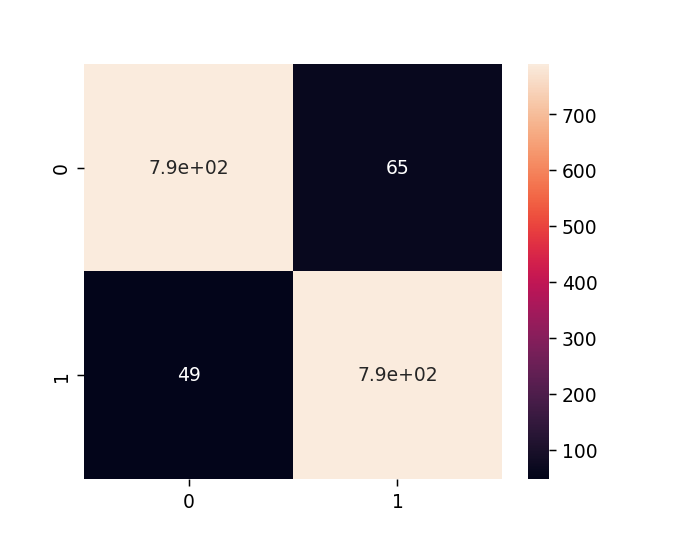

<AxesSubplot: >

In [ ]:
#Visualizing the classificartion report
plt.figure(figsize = (5,4))
sns.heatmap(confusion_matrix(Y_test,rf_pred), annot = True)

### Model Prediction Performance

- From the matrix above, the model can be seen to be doing well on all metrices.
- The model is able to predict all nonfata accidents correctly, it however missed the prediction of 140 fata accidents and classified them as non fatal giving it a recal of 84%, which gives room for improvement.

## Stacking classification

In [ ]:
#Importing necessary libraries
from sklearn.metrics import make_scorer, precision_score, recall_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier

In [ ]:
#Defining the function for model evaluation
def evaluate_model(model, X, Y):
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score)
    }
    # Carying out cross validation
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


    scores = cross_validate(model, X, Y, scoring=scoring, cv=cv,  return_estimator=True)
    return scores

In [ ]:
#Creating an instance for stacking classifier comprised of Decision Tree, KNeighbor and Gradient Boosting classification
def get_stacking():

    level0 = []
    level0.append(('tree', DecisionTreeClassifier()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('gb', GradientBoostingClassifier()))

    level1 = LogisticRegression()
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [ ]:
#Creating a function to evaluate the performance of the used models on both training and testing data
def get_models():
    models = dict()
    models['tree'] = DecisionTreeClassifier()
    models['knn'] = KNeighborsClassifier()
    models['gb'] = GradientBoostingClassifier()
    models['stacker'] = get_stacking()
    return models


models = get_models()

for name, model in models.items():
    # Evaluating training data using cross-validation
    train_scores = evaluate_model(model, X_train, Y_train)
    # Evaluating the test data using cross-validation
    test_scores = evaluate_model(model, X_test, Y_test)

    print(f'{name} Training:')
    for metric, score in train_scores.items():
        if metric != 'estimator':
            score_array = np.array(score) if isinstance(score, list) else score
            formatted_metric = metric.replace('test_', 'train_')
            print(f'  {formatted_metric}: {score_array.mean():.2f} ({score_array.std():.3f})')

    print(f'{name} Testing:')
    for metric, score in test_scores.items():
        if metric != 'estimator':
            score_array = np.array(score) if isinstance(score, list) else score
            formatted_metric = metric.replace('test_', 'test_') # Keeping the 'test_' prefix
            print(f'  {formatted_metric}: {score_array.mean():.2f} ({score_array.std():.3f})')


tree Training:
  fit_time: 0.01 (0.004)
  score_time: 0.01 (0.002)
  train_accuracy: 0.92 (0.007)
  train_precision: 0.91 (0.014)
  train_recall: 0.94 (0.013)
tree Testing:
  fit_time: 0.00 (0.001)
  score_time: 0.00 (0.001)
  test_accuracy: 0.87 (0.026)
  test_precision: 0.87 (0.030)
  test_recall: 0.88 (0.042)
knn Training:
  fit_time: 0.01 (0.002)
  score_time: 0.05 (0.003)
  train_accuracy: 0.90 (0.010)
  train_precision: 0.90 (0.012)
  train_recall: 0.90 (0.016)
knn Testing:
  fit_time: 0.00 (0.000)
  score_time: 0.01 (0.001)
  test_accuracy: 0.88 (0.025)
  test_precision: 0.89 (0.025)
  test_recall: 0.87 (0.045)
gb Training:
  fit_time: 0.50 (0.190)
  score_time: 0.01 (0.003)
  train_accuracy: 0.91 (0.008)
  train_precision: 0.91 (0.012)
  train_recall: 0.92 (0.019)
gb Testing:
  fit_time: 0.14 (0.053)
  score_time: 0.00 (0.002)
  test_accuracy: 0.91 (0.018)
  test_precision: 0.90 (0.026)
  test_recall: 0.91 (0.035)
stacker Training:
  fit_time: 2.80 (0.488)
  score_time: 0.04 (0

<IPython.core.display.Javascript object>


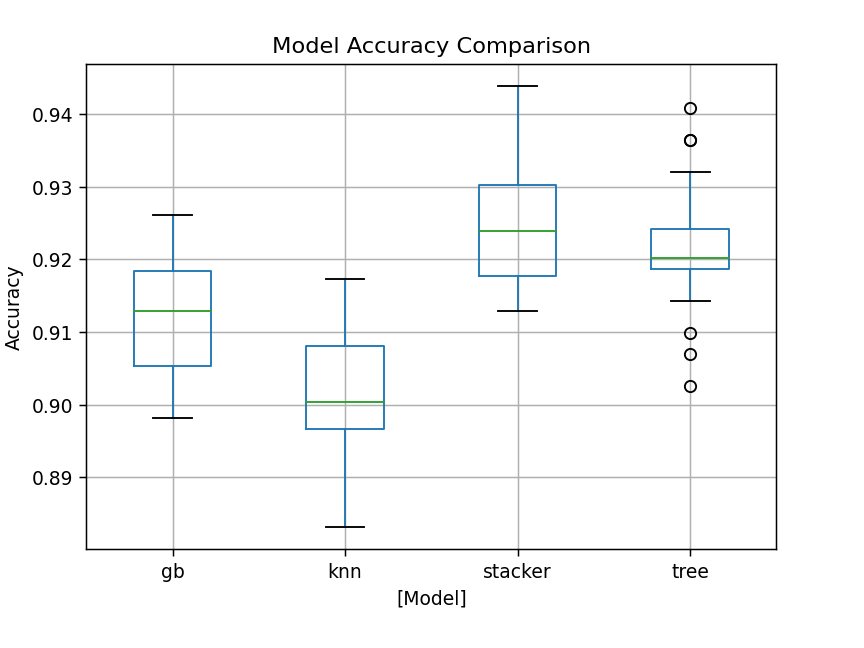

In [ ]:
#Creating a function to visualize the accuracies of the models
accuracy_data = []
for name, model in models.items():
    train_scores = evaluate_model(model, X_train, Y_train)
    accuracies = train_scores['test_accuracy']
    accuracy_data.extend([(name, acc) for acc in accuracies])

df_accuracies = pd.DataFrame(accuracy_data, columns=['Model', 'Accuracy'])

df_accuracies.boxplot(by='Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.suptitle('')
plt.show()
